# ML - Домашнее задание 4

Вам необходимо:

На примере произвольного датасета (я выбрал [Анализ покупателей](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)):

* провести кластеризацию методом, который наиболее хорошо подходит под ваши данные
* провести сравнительный анализ и получить аргументы в пользу того или иного метода (можно использовать информацию с лекции/семинара)
* прописать выводы по выбору метода на основе анализа (выводы и обоснование очень важны)

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, HDBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from scipy.cluster.hierarchy import dendrogram, linkage


## Считывание датасета

Описание датасета

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## EDA

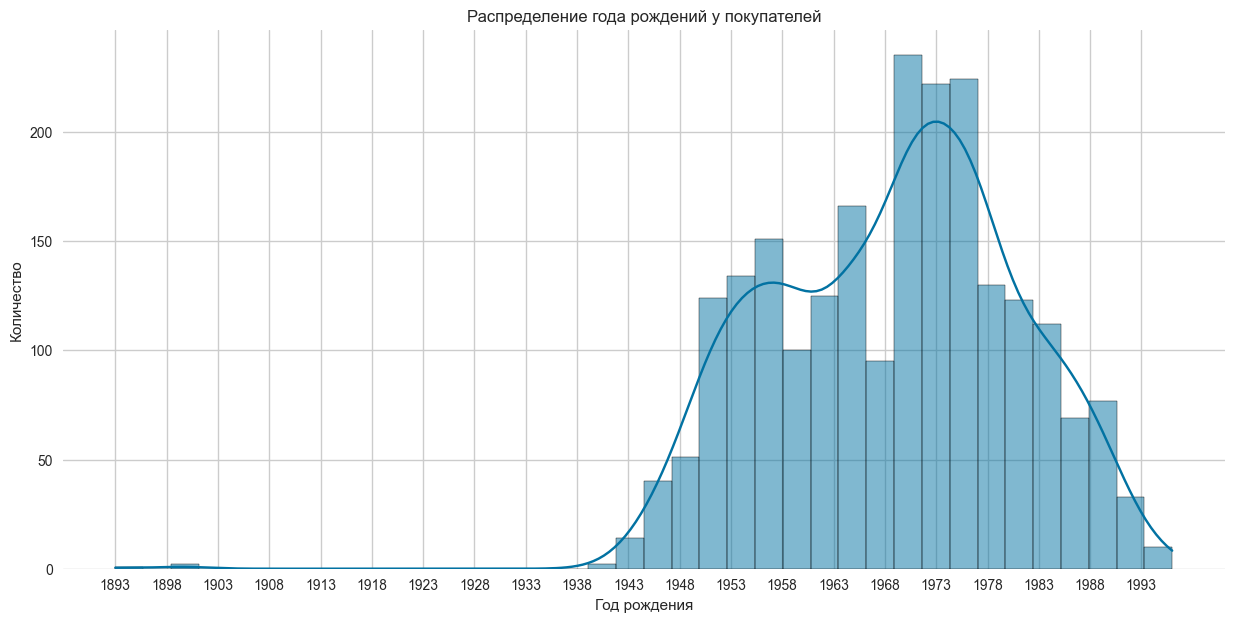

In [3]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Year_Birth'], kde = True)
plt.title('Распределение года рождений у покупателей')
plt.xticks(np.arange(min(df['Year_Birth']), max(df['Year_Birth']), 5))
plt.xlabel('Год рождения')
plt.ylabel('Количество')
plt.box(False)

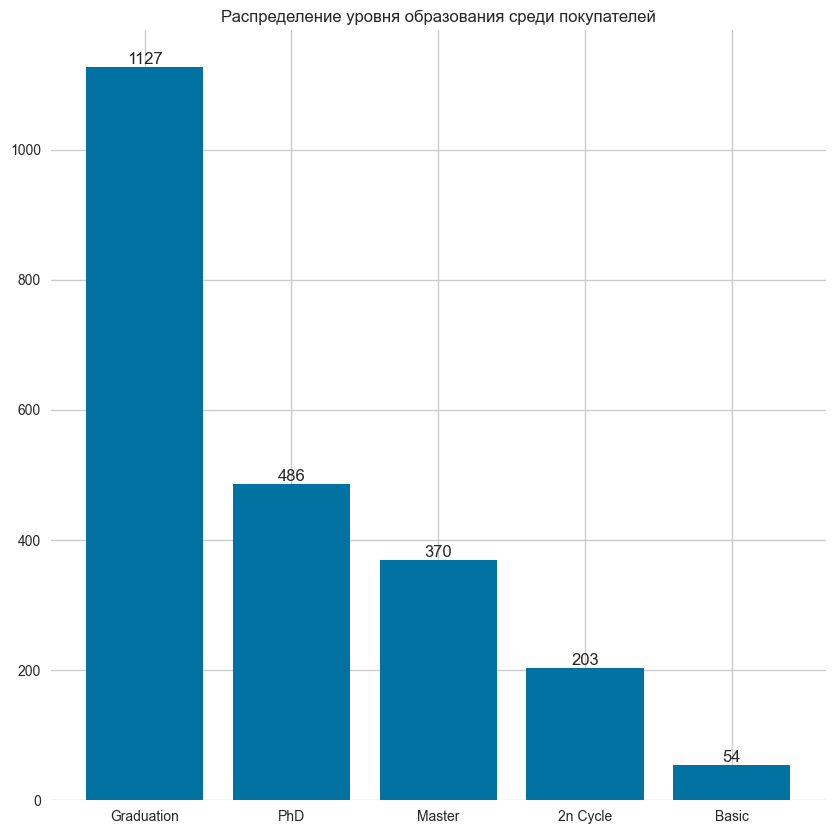

In [4]:
df_1 = df.value_counts('Education').reset_index()
df_1

plt.figure(figsize=(10, 10))
plt.title('Распределение уровня образования среди покупателей')
fig_1 = plt.bar(x = df_1['Education'], height=df_1['count'])
plt.bar_label(fig_1, labels=df_1['count'])
plt.box(False)

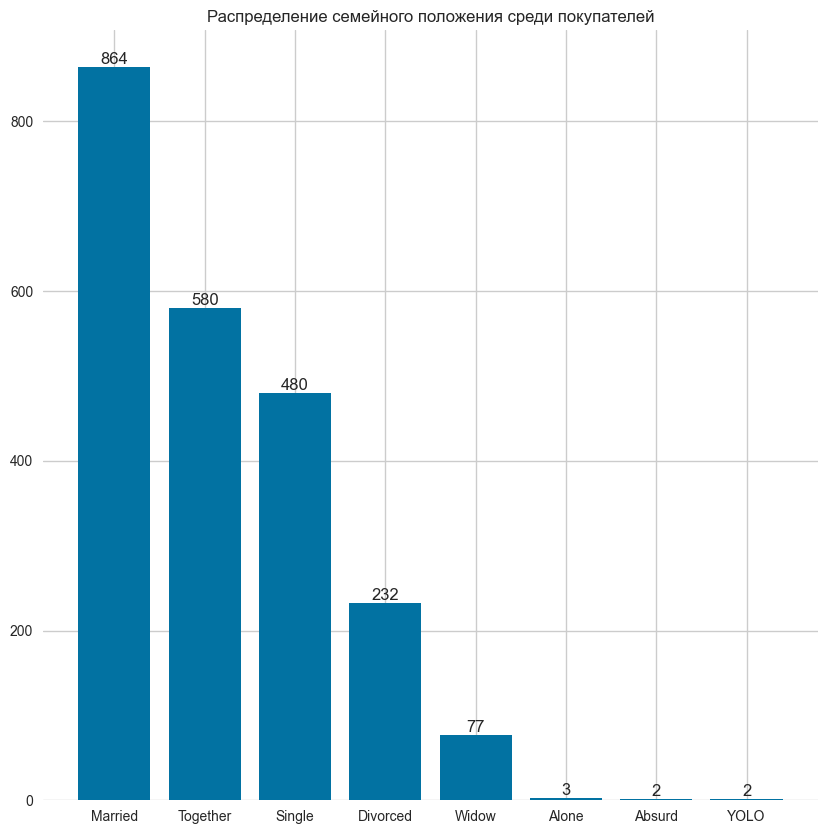

In [5]:
df_1 = df.value_counts('Marital_Status').reset_index()
df_1

plt.figure(figsize=(10, 10))
plt.title('Распределение семейного положения среди покупателей')
fig_1 = plt.bar(x = df_1['Marital_Status'], height=df_1['count'])
plt.bar_label(fig_1, labels=df_1['count'])
plt.box(False)

In [6]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

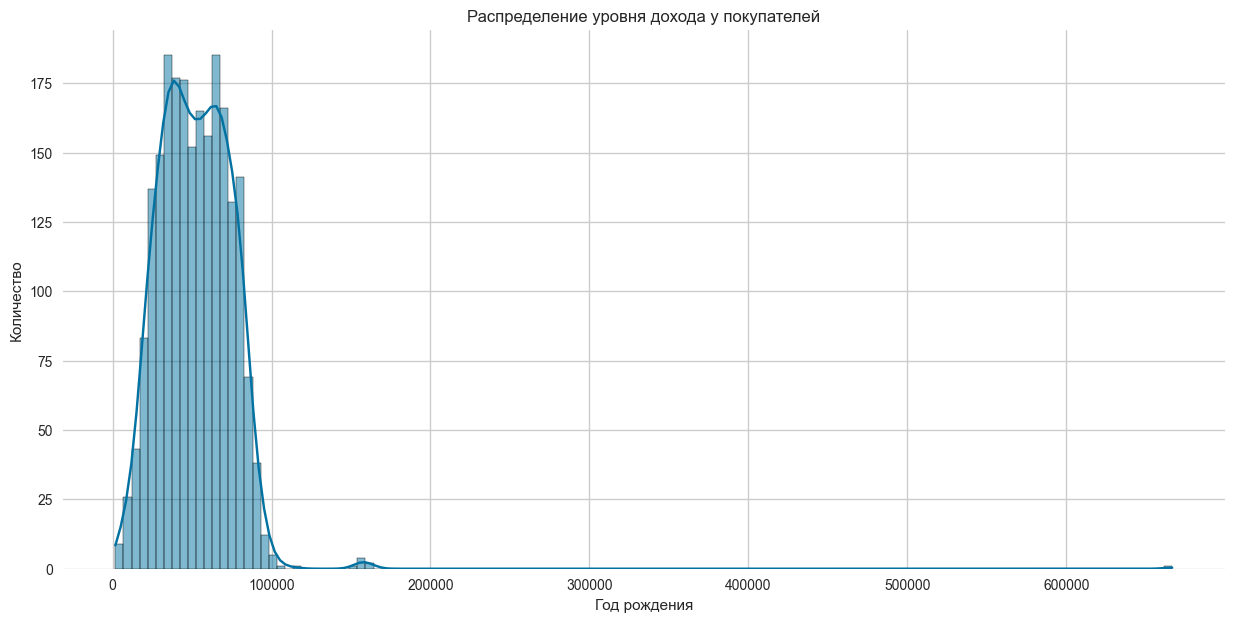

In [7]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Income'], kde = True)
plt.title('Распределение уровня дохода у покупателей')
plt.xlabel('Год рождения')
plt.ylabel('Количество')
plt.box(False)

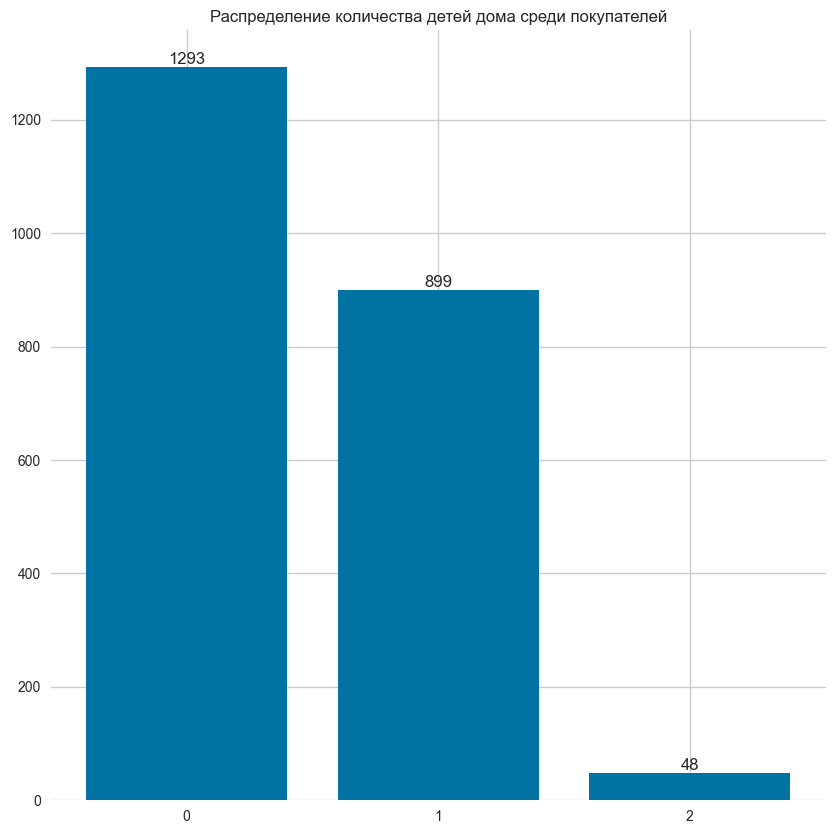

In [8]:
df_1 = df.value_counts('Kidhome').reset_index()
df_1['Kidhome'] = df_1['Kidhome'].astype('str')

plt.figure(figsize=(10, 10))
plt.title('Распределение количества детей дома среди покупателей')
fig_1 = plt.bar(x = df_1['Kidhome'], height=df_1['count'])
plt.bar_label(fig_1, labels=df_1['count'])
plt.box(False)

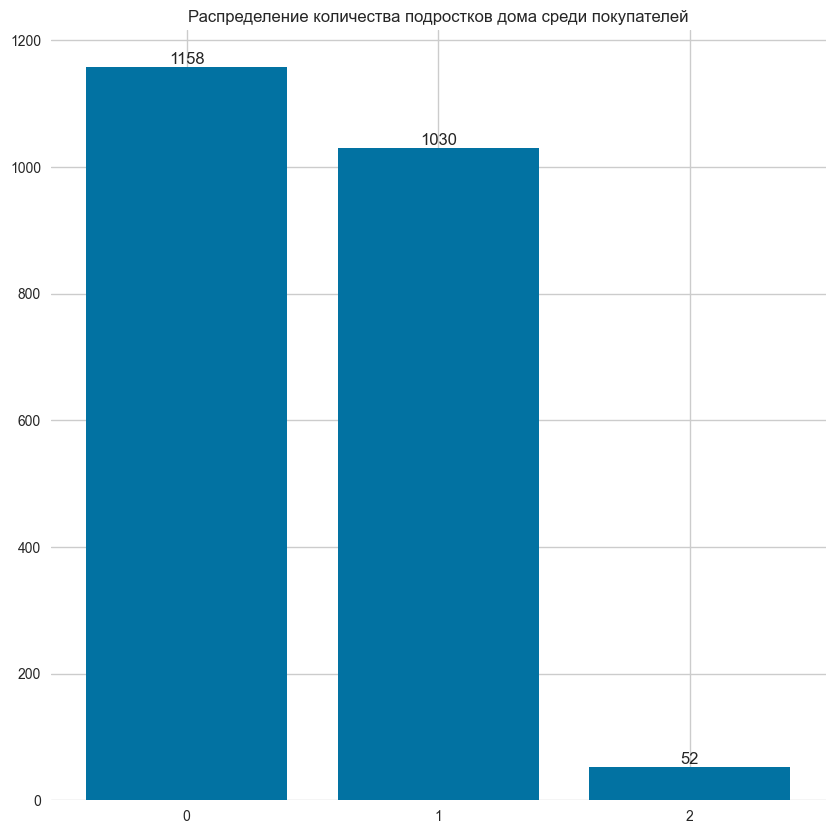

In [9]:
df_1 = df.value_counts('Teenhome').reset_index()
df_1['Teenhome'] = df_1['Teenhome'].astype('str')

plt.figure(figsize=(10, 10))
plt.title('Распределение количества подростков дома среди покупателей')
fig_1 = plt.bar(x = df_1['Teenhome'], height=df_1['count'])
plt.bar_label(fig_1, labels=df_1['count'])
plt.box(False)

Dt_Customer  count
563  2012-07-30      1
575  2012-07-31      1
270  2012-08-01      4
280  2012-08-02      3
87   2012-08-03      5
..          ...    ...
153  2014-06-25      5
250  2014-06-26      4
409  2014-06-27      3
388  2014-06-28      3
550  2014-06-29      2

[663 rows x 2 columns]

Dt_Customer  count
0    2012-08-31     12
1    2014-05-12     11
3    2012-09-12     11
2    2013-02-14     11
5    2013-08-20     10
..          ...    ...
651  2014-05-15      1
629  2012-08-15      1
625  2012-08-05      1
575  2012-07-31      1
563  2012-07-30      1

[663 rows x 2 columns]

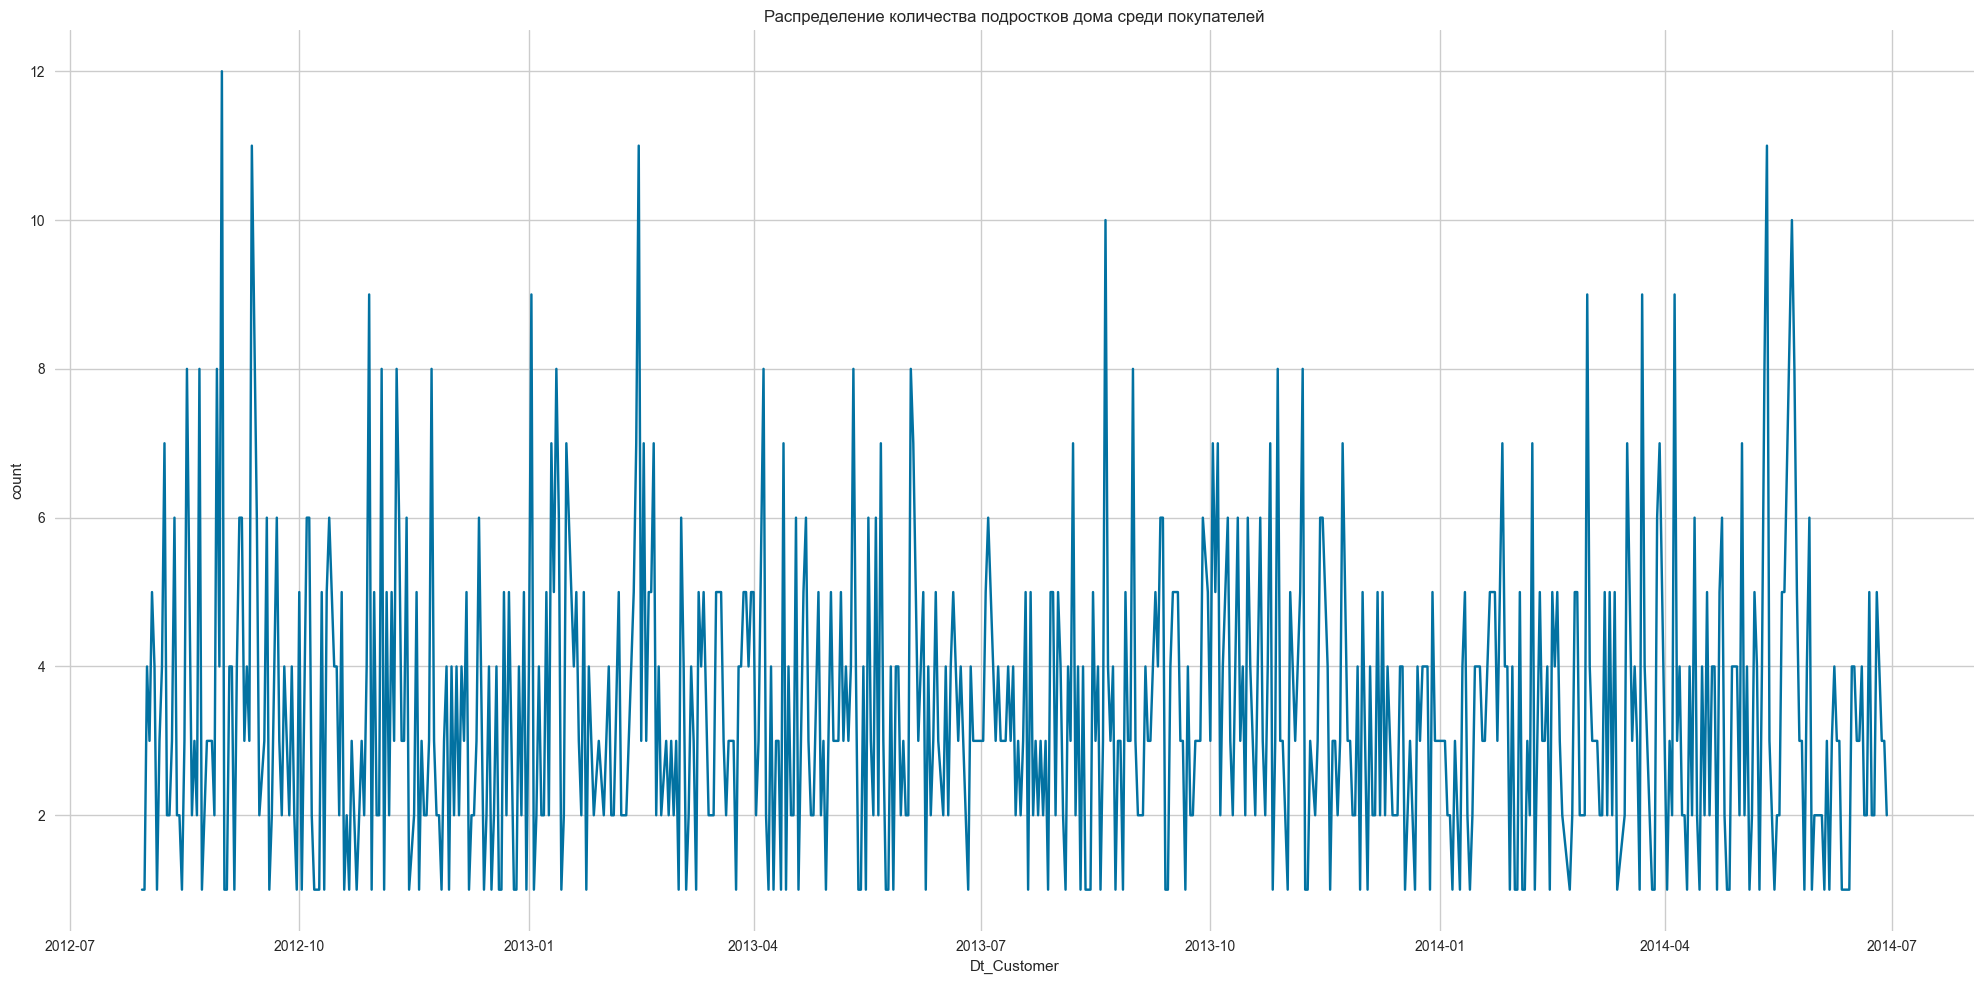

In [10]:
df_1 = df.value_counts('Dt_Customer').reset_index()
df_1['Dt_Customer'] = pd.to_datetime(df_1['Dt_Customer'])
df_1 = df_1.sort_values('Dt_Customer')
display(df_1)


plt.figure(figsize=(20, 10))
plt.title('Распределение количества подростков дома среди покупателей')
sns.lineplot(df_1, x = 'Dt_Customer', y = 'count')
plt.tight_layout()
plt.box(False)


df_1.sort_values('count', inplace=True, ascending=False)
df_1

In [11]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
df = df.dropna()

### FE

In [14]:
# Возраст клиента
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Возрастные группы
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 30, 45, 60, 100], 
                        labels=['Young', 'Adult', 'Middle', 'Senior'])

# Общее количество детей
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Признак наличия детей
df['Has_Children'] = (df['Total_Children'] > 0).astype(int)

# Семейный статус (упрощенный)
df['Marital_Status_Simple'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

In [15]:
# Общие расходы
df['Total_Spent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Доли расходов по категориям
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for col in product_columns:
    df[f'{col}_Pct'] = df[col] / df['Total_Spent']
    df[f'{col}_Pct'] = df[f'{col}_Pct'].fillna(0)

# Средний чек (если были покупки)
df['Avg_Purchase_Value'] = df['Total_Spent'] / (df['NumWebPurchases'] + 
                                               df['NumCatalogPurchases'] + 
                                               df['NumStorePurchases'] + 1)

# Доли каналов покупок
total_purchases = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Web_Purchase_Ratio'] = df['NumWebPurchases'] / (total_purchases + 1)
df['Catalog_Purchase_Ratio'] = df['NumCatalogPurchases'] / (total_purchases + 1)
df['Store_Purchase_Ratio'] = df['NumStorePurchases'] / (total_purchases + 1)

In [16]:
# Преобразование даты регистрации
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors = 'coerce')
df['Days_Since_Enrollment'] = (datetime.now() - df['Dt_Customer']).dt.days

# Время с последней покупки относительно регистрации
df['Recency_Ratio'] = df['Recency'] / df['Days_Since_Enrollment']

# Год и месяц регистрации
df['Enrollment_Year'] = df['Dt_Customer'].dt.year
df['Enrollment_Month'] = df['Dt_Customer'].dt.month
df['Enrollment_Quarter'] = df['Dt_Customer'].dt.quarter

In [17]:
# Активность клиента
df['Total_Purchases'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + 
                        df['NumStorePurchases'] + df['NumDealsPurchases'])

# Частота покупок (покупок в день)
df['Purchase_Frequency'] = df['Total_Purchases'] / (df['Days_Since_Enrollment'] + 1)

# Лояльность (отношение суммы к количеству дней)
df['Customer_Loyalty'] = df['Total_Spent'] / (df['Days_Since_Enrollment'] + 1)

# Эффективность визитов на сайт
df['Web_Conversion_Rate'] = df['NumWebPurchases'] / (df['NumWebVisitsMonth'] + 1)

# Принятие предложений
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                   'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['Total_Campaigns_Accepted'] = df[campaign_columns].sum(axis=1)
df['Campaign_Acceptance_Rate'] = df['Total_Campaigns_Accepted'] / len(campaign_columns)

# Отношение покупок со скидкой
df['Deals_Ratio'] = df['NumDealsPurchases'] / (df['Total_Purchases'] + 1)

In [18]:
cat_columns = df.select_dtypes(['object', 'category'])
df = df.drop(columns = 'Dt_Customer')
df = df.dropna()

for i in cat_columns:
    df[i] = LabelEncoder().fit_transform(df[i])

df

ID  Year_Birth  Education  Marital_Status    Income  Kidhome  \
0     5524        1957          2               4   58138.0        0   
1     2174        1954          2               4   46344.0        1   
3     6182        1984          2               5   26646.0        1   
5     7446        1967          3               5   62513.0        0   
7     6177        1985          4               3   33454.0        1   
...    ...         ...        ...             ...       ...      ...   
2224  4286        1970          4               4   57642.0        0   
2227  4201        1962          2               4   57967.0        0   
2233  9432        1977          2               5  666666.0        1   
2234  8372        1974          2               3   34421.0        1   
2236  4001        1946          4               5   64014.0        2   

      Teenhome  Recency  MntWines  MntFruits  ...  Enrollment_Year  \
0            0       58       635         88  ...           2012.0   
1            1       38        11          1  ...           2014.0   
3            0       26        11          4  ...           2014.0   
5            1       16       520         42  ...           2013.0   
7            0       32        76         10  ...           2013.0   
...        ...      ...       ...        ...  ...              ...   
2224         1       24       580          6  ...           2014.0   
2227         1       39       229          7  ...           2013.0   
2233         0       23         9         14  ...           2013.0   
2234         0       81         3          3  ...           2013.0   
2236         1       56       406          0  ...           2014.0   

      Enrollment_Month  Enrollment_Quarter  Total_Purchases  \
0                  4.0                 2.0               25   
1                  8.0                 3.0                6   
3                 10.0                 4.0                8   
5                  9.0                 3.0               22   
7                  8.0                 3.0               10   
...                ...                 ...              ...   
2224               9.0                 3.0               22   
2227               3.0                 1.0               19   
2233               2.0                 1.0               11   
2234               1.0                 1.0                4   
2236              10.0                 4.0               22   

      Purchase_Frequency  Customer_Loyalty  Web_Conversion_Rate  \
0               0.005044          0.326271             1.000000   
1               0.001460          0.006569             0.166667   
3               0.001975          0.013086             0.285714   
5               0.004957          0.161334             0.857143   
7               0.002236          0.037782             0.444444   
...                  ...               ...                  ...   
2224            0.005391          0.166381             1.400000   
2227            0.004105          0.101124             0.666667   
2233            0.002364          0.013325             0.428571   
2234            0.000854          0.006406             0.125000   
2236            0.005437          0.109738             1.000000   

      Total_Campaigns_Accepted  Campaign_Acceptance_Rate  Deals_Ratio  
0                            1                  0.166667     0.115385  
1                            0                  0.000000     0.285714  
3                            0                  0.000000     0.222222  
5                            0                  0.000000     0.086957  
7                            0                  0.000000     0.181818  
...                        ...                       ...          ...  
2224                         1                  0.166667     0.130435  
2227                         0                  0.000000     0.250000  
2233                         0                  0.000000     0.333333  
2234                

## Kmeans

Чтобы привести все признаки к единому масшабу, проводим стандартизацию

In [19]:
df_clean = df

scaler = StandardScaler()
label = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns=label)

In [20]:
df

ID  Year_Birth  Education  Marital_Status     Income   Kidhome  \
0   -0.082092   -1.015619  -0.334073        0.216416   0.155793 -0.825286   
1   -1.109102   -1.269406  -0.334073        0.216416  -0.234608  1.005311   
2    0.119631    1.268472  -0.334073        1.140267  -0.886644  1.005311   
3    0.507136   -0.169659   0.517577        1.140267   0.300612 -0.825286   
4    0.118098    1.353067   1.369228       -0.707435  -0.661288  1.005311   
..        ...         ...        ...             ...        ...       ...   
900 -0.461626    0.084129   1.369228        0.216416   0.139374 -0.825286   
901 -0.487684   -0.592639  -0.334073        0.216416   0.150132 -0.825286   
902  1.115984    0.676300  -0.334073        1.140267  20.299059  1.005311   
903  0.791020    0.422512  -0.334073       -0.707435  -0.629279  1.005311   
904 -0.548999   -1.946174   1.369228        1.140267   0.350298  2.835908   

     Teenhome   Recency  MntWines  MntFruits  ...  Enrollment_Year  \
0   -0.934362  0.322664  0.976036   1.451404  ...        -1.470543   
1    0.895935 -0.363372 -0.888779  -0.651389  ...         1.444772   
2   -0.934362 -0.774993 -0.888779  -0.578879  ...         1.444772   
3    0.895935 -1.118011  0.632360   0.339582  ...        -0.012885   
4   -0.934362 -0.569183 -0.694527  -0.433859  ...        -0.012885   
..        ...       ...       ...        ...  ...              ...   
900  0.895935 -0.843597  0.811669  -0.530539  ...         1.444772   
901  0.895935 -0.329070 -0.237289  -0.506369  ...        -0.012885   
902 -0.934362 -0.877899 -0.894756  -0.337179  ...        -0.012885   
903 -0.934362  1.111606 -0.912687  -0.603049  ...        -0.012885   
904  0.895935  0.254061  0.291673  -0.675559  ...         1.444772   

     Enrollment_Month  Enrollment_Quarter  Total_Purchases  \
0           -0.758546           -0.496116         1.298480   
1            0.367299            0.377396        -1.172455   
2            0.930221            1.250908        -0.912356   
3            0.648760            0.377396         0.908333   
4            0.367299            0.377396        -0.652258   
..                ...                 ...              ...   
900          0.648760            0.377396         0.908333   
901         -1.040007           -1.369629         0.518185   
902         -1.321468           -1.369629        -0.522209   
903         -1.602929           -1.369629        -1.432553   
904          0.930221            1.250908         0.908333   

     Purchase_Frequency  Customer_Loyalty  Web_Conversion_Rate  \
0              1.024883          1.417108             0.167740   
1             -1.110786         -0.977370            -0.649562   
2             -0.803678         -0.928559            -0.532805   
3              0.972927          0.181774             0.027631   
4             -0.648575         -0.743594            -0.377128   
..                  ...               ...                  ...   
900            1.231295          0.219574             0.560045   
901            0.465458         -0.269185            -0.159181   
902           -0.572056         -0.926774            -0.392696   
903           -1.471663         -0.978592            -0.690427   
904            1.259079         -0.204665             0.167740   

     Total_Campaigns_Accepted  Campaign_Acceptance_Rate  Deals_Ratio  
0                    0.607293                  0.607293    -0.468289  
1                   -0.498542                 -0.498542     1.283949  
2                   -0.498542                 -0.498542     0.630785  
3                   -0.498542                 -0.498542    -0.760738  
4                   -0.498542                 -0.498542     0.215135  
..                        ...                       ...          ...  
900                  0.607293                  0.607293    -0.313463  
901                 -0.498542                 -0.498542     0.916544  
902                 -0.498542                 -0.498542     1.773822

In [21]:
inertias = []
silhouette = []

for k in range(2, df.shape[1]):
    model_i = KMeans(k)
    model_i.fit_transform(df)
    inertias.append(model_i.inertia_)
    silhouette.append(silhouette_score(df, model_i.fit_predict(df)))

In [22]:
print(inertias)
print(silhouette)

[39639.725477034284, 36335.898953926764, 34385.721440308305, 33994.27954469194, 31937.845723054033, 31346.67607142404, 30842.948420967106, 30376.82458934797, 29892.608014537684, 29154.24662718388, 29144.672604383533, 27887.364734618128, 27961.059043091576, 27057.333627880853, 27909.06371446471, 26936.041512086318, 25600.88447890015, 25462.68994002047, 25438.1580889125, 24899.22320527089, 24485.963382681733, 24131.296682682525, 24277.927971401215, 23344.474213773585, 23282.858232538812, 23220.436888666045, 23104.630170491713, 22332.311369192623, 22276.867615442767, 22342.516298493465, 22343.13196551014, 22043.833884754567, 21996.453641650554, 21778.89885540456, 21332.816863924545, 21166.45537581241, 20930.33454211767, 20828.647491134056, 20675.468384143605, 20530.298635146035, 20931.269892120145, 20347.98791121541, 20216.496427299346, 20249.91628151844, 20493.969636580725, 20381.90177504158, 20024.635338952, 19779.02435454657, 19624.04160637883, 19563.15859842251, 19383.665741234472, 19

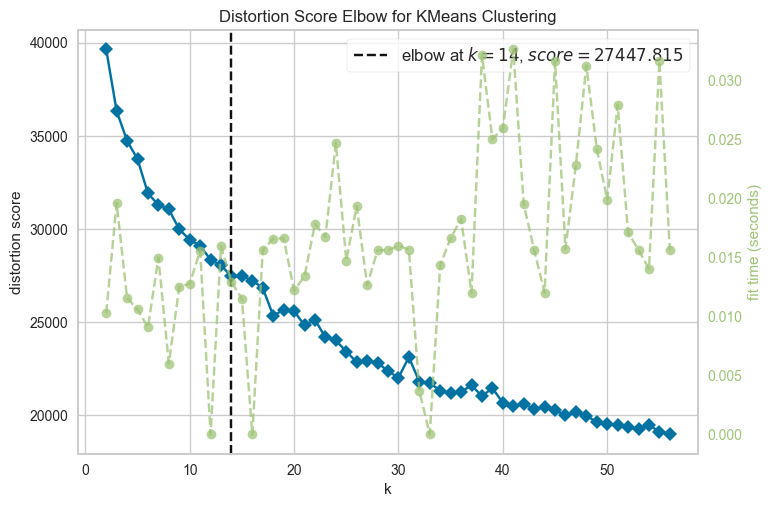

In [23]:
model = KElbowVisualizer(KMeans(), k = df.shape[1])
model.fit(df)
model.show()
k_optimal = model.elbow_value_

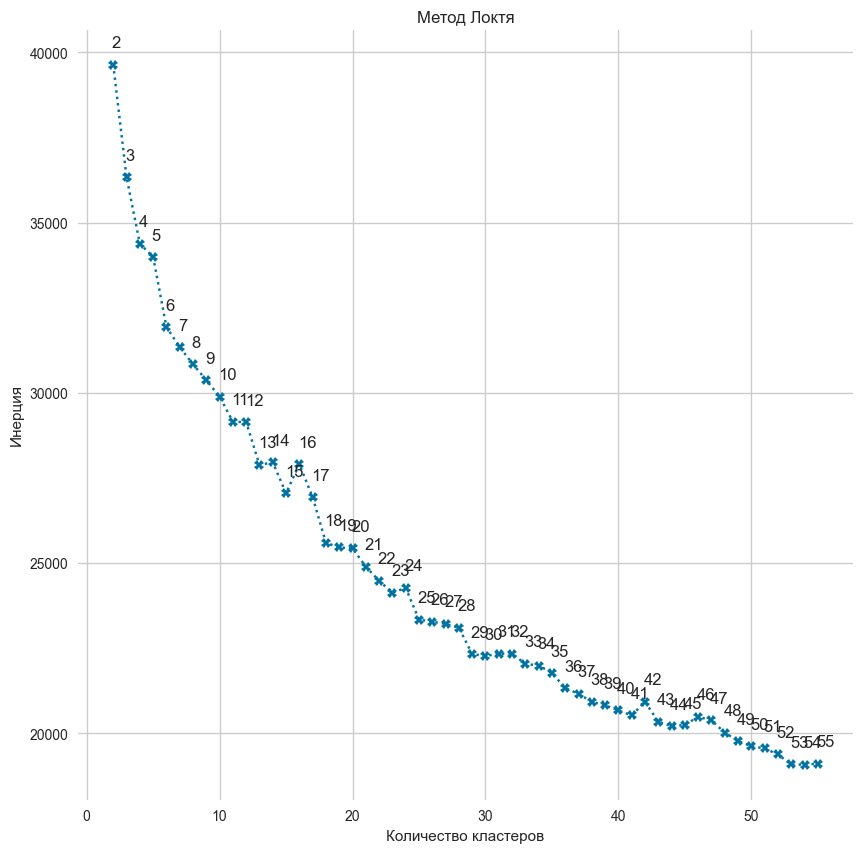

In [24]:
plt.figure(figsize=(10, 10))
plt.title('Метод Локтя')

for i in range(len(inertias)):
    plt.text(i + 1.9, inertias[i] + 500, s=i+2)

plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.plot(np.arange(2, df.shape[1]), inertias,  marker = 'X', linestyle = ':')
plt.box(False)

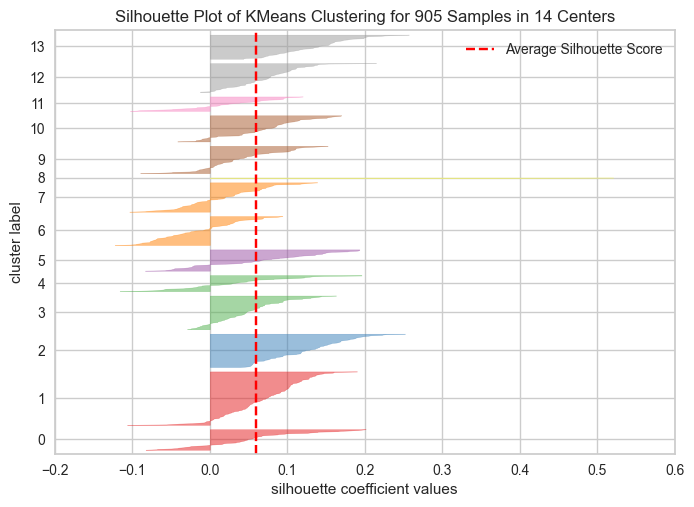

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 905 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
model = SilhouetteVisualizer(KMeans(14))
model.fit(df)
model.show()

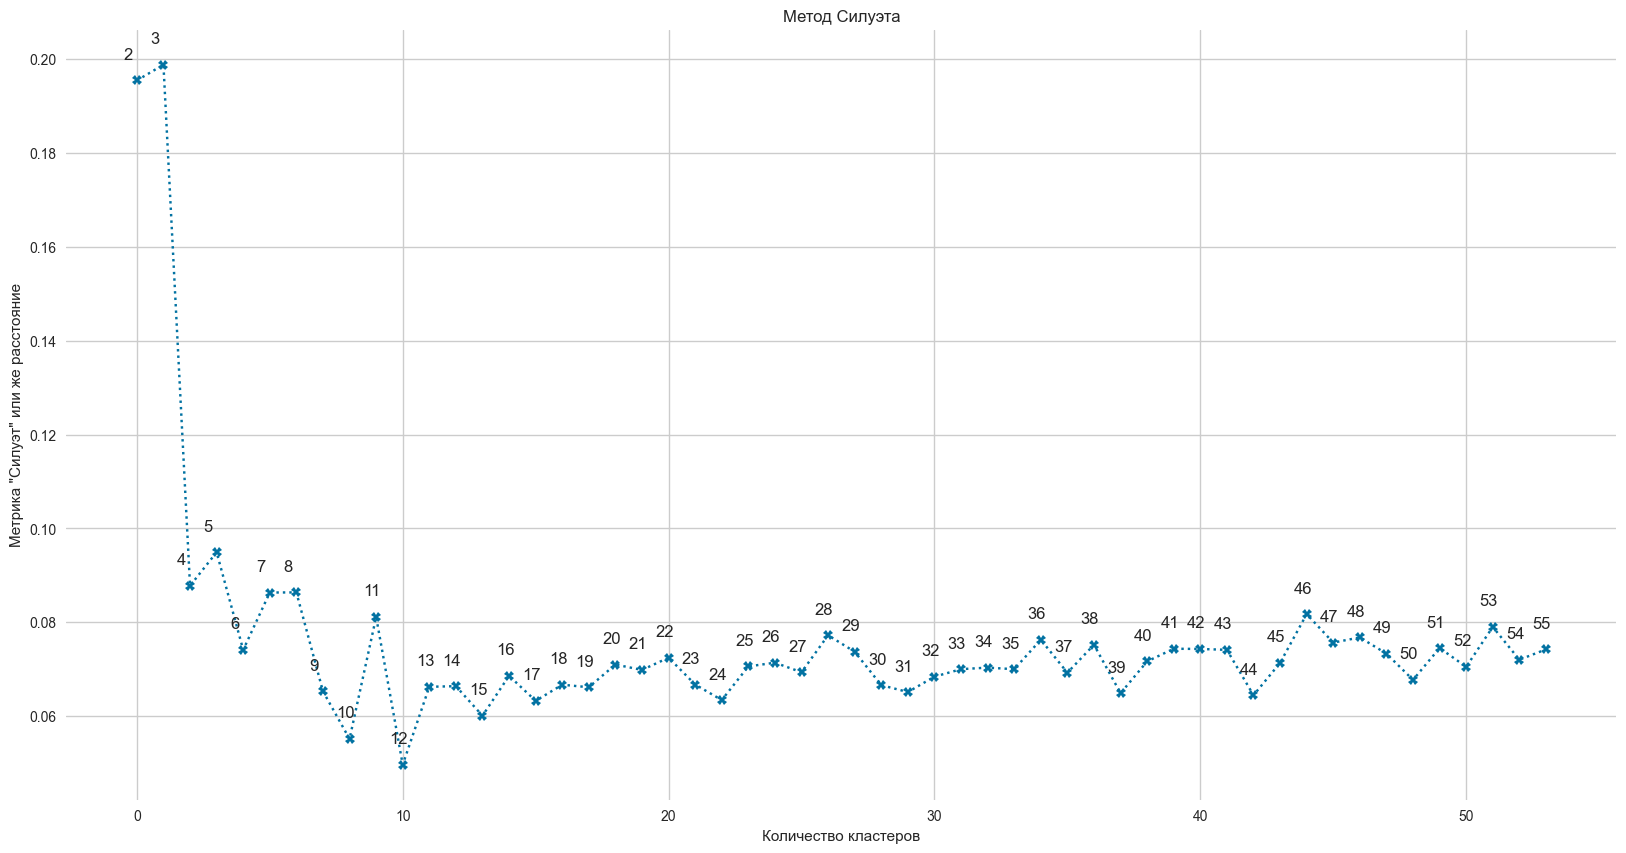

In [26]:
plt.figure(figsize=(20, 10))
plt.title('Метод Силуэта')

for i in range(len(silhouette)):
    plt.text(x = i - 0.5, y = silhouette[i] + 0.0045, s = i + 2)

plt.xlabel('Количество кластеров')
plt.ylabel('Метрика "Силуэт" или же расстояние')
plt.plot(np.arange(len(silhouette)), silhouette, marker = 'X', linestyle = ':')
plt.box(False)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Создаем модели
model = KMeans(k_optimal, random_state=42)

labels = model.fit_predict(df)

df['cluster'] = labels

display(df)
print(df.info())


ID  Year_Birth  Education  Marital_Status     Income   Kidhome  \
0   -0.082092   -1.015619  -0.334073        0.216416   0.155793 -0.825286   
1   -1.109102   -1.269406  -0.334073        0.216416  -0.234608  1.005311   
2    0.119631    1.268472  -0.334073        1.140267  -0.886644  1.005311   
3    0.507136   -0.169659   0.517577        1.140267   0.300612 -0.825286   
4    0.118098    1.353067   1.369228       -0.707435  -0.661288  1.005311   
..        ...         ...        ...             ...        ...       ...   
900 -0.461626    0.084129   1.369228        0.216416   0.139374 -0.825286   
901 -0.487684   -0.592639  -0.334073        0.216416   0.150132 -0.825286   
902  1.115984    0.676300  -0.334073        1.140267  20.299059  1.005311   
903  0.791020    0.422512  -0.334073       -0.707435  -0.629279  1.005311   
904 -0.548999   -1.946174   1.369228        1.140267   0.350298  2.835908   

     Teenhome   Recency  MntWines  MntFruits  ...  Enrollment_Month  \
0   -0.934362  0.322664  0.976036   1.451404  ...         -0.758546   
1    0.895935 -0.363372 -0.888779  -0.651389  ...          0.367299   
2   -0.934362 -0.774993 -0.888779  -0.578879  ...          0.930221   
3    0.895935 -1.118011  0.632360   0.339582  ...          0.648760   
4   -0.934362 -0.569183 -0.694527  -0.433859  ...          0.367299   
..        ...       ...       ...        ...  ...               ...   
900  0.895935 -0.843597  0.811669  -0.530539  ...          0.648760   
901  0.895935 -0.329070 -0.237289  -0.506369  ...         -1.040007   
902 -0.934362 -0.877899 -0.894756  -0.337179  ...         -1.321468   
903 -0.934362  1.111606 -0.912687  -0.603049  ...         -1.602929   
904  0.895935  0.254061  0.291673  -0.675559  ...          0.930221   

     Enrollment_Quarter  Total_Purchases  Purchase_Frequency  \
0             -0.496116         1.298480            1.024883   
1              0.377396        -1.172455           -1.110786   
2              1.250908        -0.912356           -0.803678   
3              0.377396         0.908333            0.972927   
4              0.377396        -0.652258           -0.648575   
..                  ...              ...                 ...   
900            0.377396         0.908333            1.231295   
901           -1.369629         0.518185            0.465458   
902           -1.369629        -0.522209           -0.572056   
903           -1.369629        -1.432553           -1.471663   
904            1.250908         0.908333            1.259079   

     Customer_Loyalty  Web_Conversion_Rate  Total_Campaigns_Accepted  \
0            1.417108             0.167740                  0.607293   
1           -0.977370            -0.649562                 -0.498542   
2           -0.928559            -0.532805                 -0.498542   
3            0.181774             0.027631                 -0.498542   
4           -0.743594            -0.377128                 -0.498542   
..                ...                  ...                       ...   
900          0.219574             0.560045                  0.607293   
901         -0.269185            -0.159181                 -0.498542   
902         -0.926774            -0.392696                 -0.498542   
903         -0.978592            -0.690427                 -0.498542   
904         -0.204665             0.167740                  0.607293   

     Campaign_Acceptance_Rate  Deals_Ratio  cluster  
0                    0.607293    -0.468289        0  
1                   -0.498542     1.283949        4  
2                   -0.498542     0.630785        9  
3                   -0.498542    -0.760738        5  
4                   -0.498542     0.215135        1  
..                        ...          ...      ...  
900                  0.607293    -0.313463        5  
901                 -0.498542     0.916544        8  
902                 -0.498542     1.773822       11  
903                 -0.498542     0.402178        9  
904  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        905 non-null    float64
 1   Year_Birth                905 non-null    float64
 2   Education                 905 non-null    float64
 3   Marital_Status            905 non-null    float64
 4   Income                    905 non-null    float64
 5   Kidhome                   905 non-null    float64
 6   Teenhome                  905 non-null    float64
 7   Recency                   905 non-null    float64
 8   MntWines                  905 non-null    float64
 9   MntFruits                 905 non-null    float64
 10  MntMeatProducts           905 non-null    float64
 11  MntFishProducts           905 non-null    float64
 12  MntSweetProducts          905 non-null    float64
 13  MntGoldProds              905 non-null    float64
 14  NumDealsPu

Информация по каждому кластеру

In [28]:
df_clean['cluster'] = df['cluster'].values

num_cols = df_clean.select_dtypes(['float']).columns
df_stat_1 = df_clean.groupby('cluster')[num_cols].mean()


int_cols = df_clean.select_dtypes(['int']).columns
df_stat_2 = df_clean.groupby('cluster')[int_cols].median()

df_stat = pd.concat([df_stat_1, df_stat_2], axis=1)
df_stat

Income  MntWines_Pct  MntFruits_Pct  MntMeatProducts_Pct  \
cluster                                                                   
0        76351.086957      0.359471       0.049063             0.401868   
1        35546.159091      0.443393       0.031002             0.314553   
2        34409.593750      0.356190       0.035872             0.208296   
3        77622.300000      0.612548       0.027475             0.230479   
4        42515.704348      0.603223       0.022151             0.210415   
5        57277.694737      0.723507       0.018320             0.155835   
6        80241.571429      0.558905       0.035690             0.216686   
7        82586.604167      0.480315       0.038884             0.335764   
8        48213.483333      0.564948       0.031872             0.217523   
9        25797.490566      0.127948       0.115507             0.234301   
10       63564.302632      0.678806       0.027288             0.178257   
11       70468.465909      0.359000       0.099536             0.243893   
12       34645.000000      0.244194       0.072846             0.199422   
13        5786.000000      0.119640       0.010379             0.056377   

         MntFishProducts_Pct  MntSweetProducts_Pct  MntGoldProds_Pct  \
cluster                                                                
0                   0.080585              0.054758          0.054254   
1                   0.052959              0.039594          0.118500   
2                   0.055543              0.039365          0.304734   
3                   0.055728              0.027066          0.046705   
4                   0.035096              0.021934          0.107181   
5                   0.025036              0.017912          0.059390   
6                   0.068370              0.048886          0.071464   
7                   0.051940              0.045634          0.047463   
8                   0.047121              0.026495          0.112041   
9                   0.168243              0.103974          0.250026   
10                  0.028422              0.019721          0.067506   
11                  0.115547              0.081892          0.100132   
12                  0.136980              0.103578          0.242979   
13                  0.008795              0.007975          0.796835   

         Avg_Purchase_Value  Web_Purchase_Ratio  Catalog_Purchase_Ratio  ...  \
cluster                                                                  ...   
0                 68.505427            0.222167                0.328244  ...   
1                 11.278656            0.316997                0.035747  ...   
2                 23.861157            0.347187                0.193807  ...   
3                 74.143869            0.245838                0.264768  ...   
4                 10.669422            0.238137                0.053010  ...   
5                 31.279837            0.383719                0.134318  ...   
6                 69.511683            0.222880                0.285639  ...   
7                 87.858431            0.270162                0.308612  ...   
8                 28.583933            0.389528                0.124737  ...   
9                 10.393392            0.280587                0.061198  ...   
10                54.831240            0.310935                0.228771  ...   
11                42.920036            0.297712                0.188133  ...   
12                13.928767            0.221507                0.111588  ...   
13                14.903846            0.923077                0.019231  ...   

         Response   Age  Age_Group  Total_Children  Has_Children  \
cluster                                                            
0             0.0  55.0        1.0             0.0           0.0   
1             0.0  48.0        1.0             1.0           1.0   
2             1.0  54.0        1.0             1.0           1.0   
3             0.0  64.5        2.0      

<Axes: xlabel='Age', ylabel='Income'>

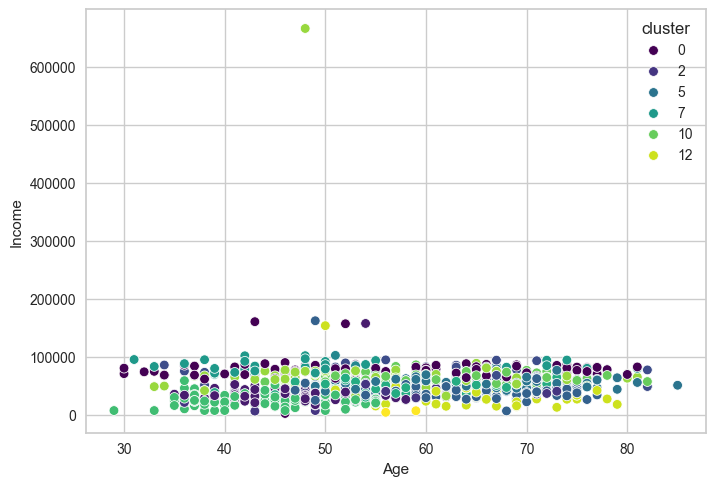

In [29]:
sns.scatterplot(x=df_clean['Age'], y = df_clean['Income'], hue=df_clean['cluster'], palette='viridis')

<Axes: xlabel='Total_Purchases', ylabel='Income'>

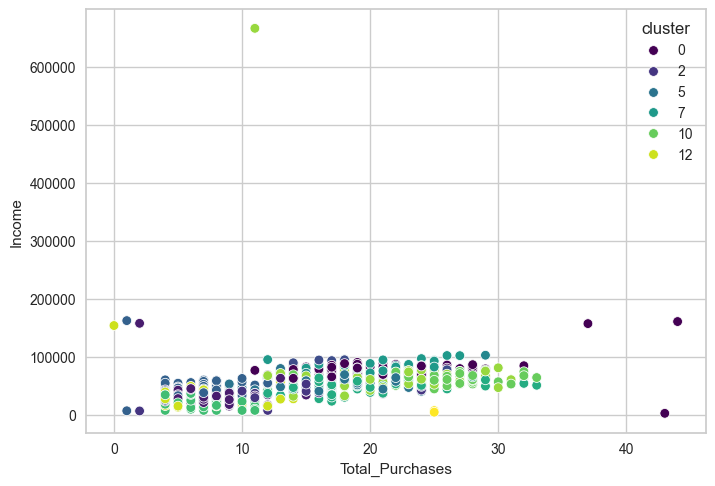

In [30]:
sns.scatterplot(x=df_clean['Total_Purchases'], y = df_clean['Income'], hue=df_clean['cluster'], palette='viridis')

<Axes: xlabel='Age', ylabel='Purchase_Frequency'>

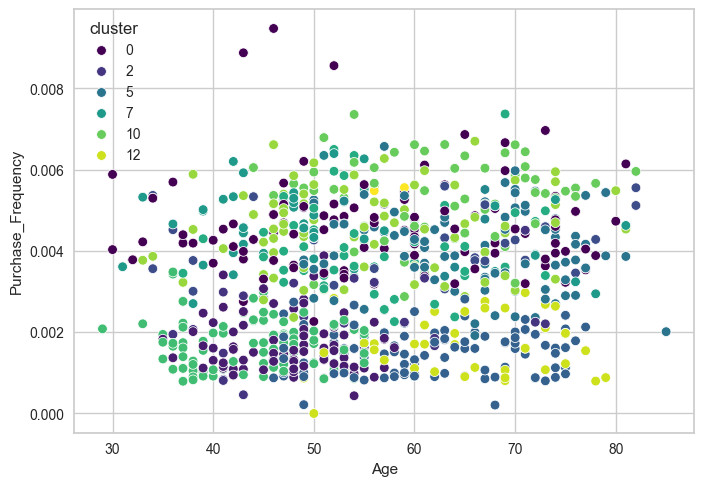

In [31]:
sns.scatterplot(x=df_clean['Age'], y = df_clean['Purchase_Frequency'], hue=df_clean['cluster'], palette='viridis')

In [32]:
pca_model = PCA(n_components=5, random_state=42)

df_scaled = df.drop(columns = 'cluster')

new_df = pca_model.fit_transform(df_scaled)

In [33]:
yticks = [f'PCA_{i}' for i in range(5)]

df_pca = pd.DataFrame(index=yticks, data = pca_model.components_, columns=df.drop(columns = 'cluster').columns)

df_pca = df_pca.T
#display(df_pca)

count = 0
for i in df_pca.columns:
    print(f'Максимально значимые признаки для PCA_{count}')
    display(df_pca.nlargest(5, i))
    count += 1

Максимально значимые признаки для PCA_0


PCA_0     PCA_1     PCA_2     PCA_3     PCA_4
Customer_Loyalty    0.263432  0.008186 -0.025380 -0.007397  0.055461
Total_Spent         0.263202  0.011132 -0.024537  0.013226  0.041586
Avg_Purchase_Value  0.241655  0.000008  0.003640 -0.007801  0.025220
MntMeatProducts     0.225228 -0.080711 -0.056939 -0.024667  0.057968
MntWines            0.225161  0.118267  0.066582  0.000194  0.052099

Максимально значимые признаки для PCA_1


PCA_0     PCA_1     PCA_2     PCA_3     PCA_4
MntWines_Pct    0.038358  0.338663  0.108641 -0.156193  0.090083
Teenhome       -0.051955  0.314465 -0.087147  0.015345 -0.030451
Age             0.035146  0.272011 -0.081558 -0.141374 -0.368744
Age_Group       0.030842  0.257649 -0.096473 -0.129907 -0.347783
Total_Children -0.166083  0.221870  0.006322  0.070446  0.076738

Максимально значимые признаки для PCA_2


PCA_0     PCA_1     PCA_2     PCA_3     PCA_4
Total_Campaigns_Accepted  0.157627 -0.029654  0.410214  0.035919 -0.051502
Campaign_Acceptance_Rate  0.157627 -0.029654  0.410214  0.035919 -0.051502
Response                  0.097790 -0.045413  0.322960  0.119204 -0.106844
AcceptedCmp4              0.087467  0.078571  0.272278 -0.026447 -0.002633
AcceptedCmp5              0.146059 -0.054169  0.245673 -0.072291  0.004933

Максимально значимые признаки для PCA_3


PCA_0     PCA_1     PCA_2     PCA_3     PCA_4
Days_Since_Enrollment  0.026522  0.011325  0.016455  0.369545 -0.277664
Web_Purchase_Ratio    -0.015791  0.168904  0.038610  0.284447  0.141544
NumDealsPurchases     -0.021963  0.207245 -0.066440  0.279781  0.108962
NumWebVisitsMonth     -0.161044  0.101563  0.136343  0.239351  0.014962
NumWebPurchases        0.149755  0.190449 -0.059845  0.233147  0.124877

Максимально значимые признаки для PCA_4


PCA_0     PCA_1     PCA_2     PCA_3     PCA_4
Year_Birth         -0.035146 -0.272011  0.081558  0.141374  0.368744
Enrollment_Quarter -0.009767  0.017430  0.028104 -0.154691  0.276961
Recency_Ratio      -0.002385  0.013531 -0.091402 -0.016994  0.266213
Enrollment_Month   -0.007298  0.022280  0.016117 -0.161291  0.265516
Recency             0.000230  0.015260 -0.090362  0.019716  0.239517

### Интерпретация

Мы получили, что каждая компонента является какой-то опредленной характеристикой клиента (если судить по 5 значимым столбцам). Например:

* Первая компонента -- это больше про статус покупателя: лояльность, сколько всего потратил денег, сколько купил и так далее
* Вторая компонента -- больше про демографию и семейный статус
* Третья компонента -- Отклик на маркетинг
* Четвертая компонента -- Онлайн-активность и давность
* Пятая компонента -- Временные паттерны

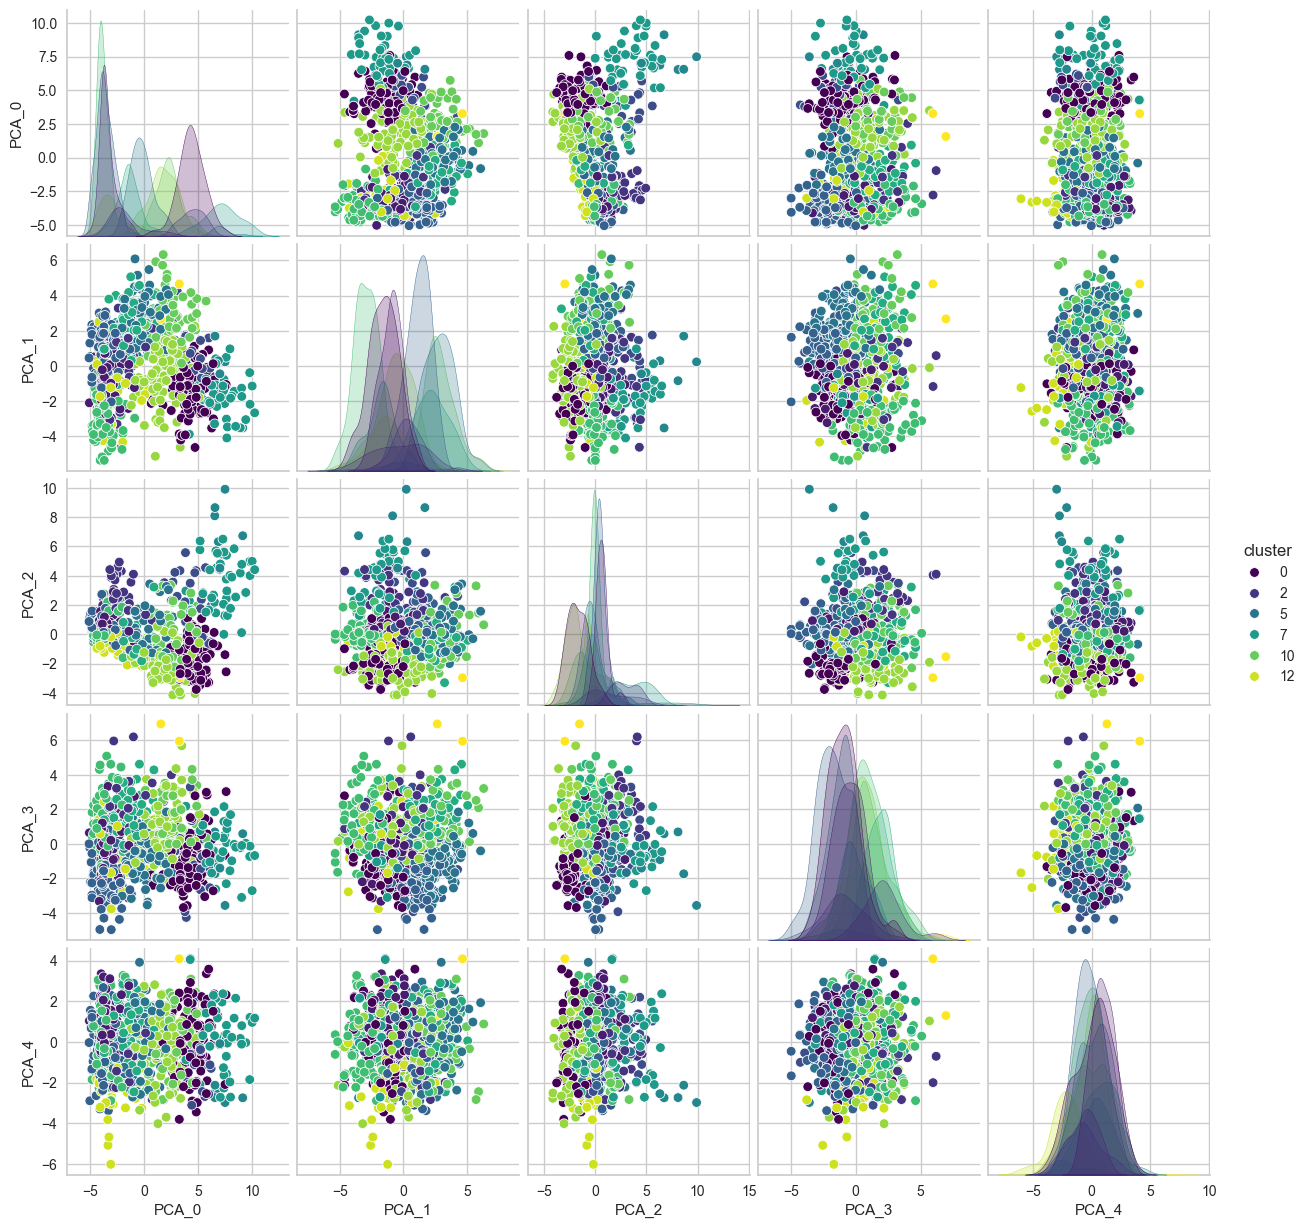

In [34]:
pca_analysis_final = pd.DataFrame(new_df, columns=yticks)
pca_analysis_final['cluster'] = df['cluster'].values


sns.pairplot(pca_analysis_final, hue='cluster', palette='viridis')

### Итог

PCA показал нам направления/профили групп, что говорит нам о том, что структурно можно поделить на класетры, но KMeans не особо хорошо показал себя. Попробуем тогда другие методы: DBSCAN и Иерархическую кластеризацию

## DBSCAN

In [35]:
df = df_clean

scaler = StandardScaler()
label = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns=label).drop(columns='cluster')

df

ID  Year_Birth  Education  Marital_Status     Income   Kidhome  \
0   -0.082092   -1.015619  -0.334073        0.216416   0.155793 -0.825286   
1   -1.109102   -1.269406  -0.334073        0.216416  -0.234608  1.005311   
2    0.119631    1.268472  -0.334073        1.140267  -0.886644  1.005311   
3    0.507136   -0.169659   0.517577        1.140267   0.300612 -0.825286   
4    0.118098    1.353067   1.369228       -0.707435  -0.661288  1.005311   
..        ...         ...        ...             ...        ...       ...   
900 -0.461626    0.084129   1.369228        0.216416   0.139374 -0.825286   
901 -0.487684   -0.592639  -0.334073        0.216416   0.150132 -0.825286   
902  1.115984    0.676300  -0.334073        1.140267  20.299059  1.005311   
903  0.791020    0.422512  -0.334073       -0.707435  -0.629279  1.005311   
904 -0.548999   -1.946174   1.369228        1.140267   0.350298  2.835908   

     Teenhome   Recency  MntWines  MntFruits  ...  Enrollment_Year  \
0   -0.934362  0.322664  0.976036   1.451404  ...        -1.470543   
1    0.895935 -0.363372 -0.888779  -0.651389  ...         1.444772   
2   -0.934362 -0.774993 -0.888779  -0.578879  ...         1.444772   
3    0.895935 -1.118011  0.632360   0.339582  ...        -0.012885   
4   -0.934362 -0.569183 -0.694527  -0.433859  ...        -0.012885   
..        ...       ...       ...        ...  ...              ...   
900  0.895935 -0.843597  0.811669  -0.530539  ...         1.444772   
901  0.895935 -0.329070 -0.237289  -0.506369  ...        -0.012885   
902 -0.934362 -0.877899 -0.894756  -0.337179  ...        -0.012885   
903 -0.934362  1.111606 -0.912687  -0.603049  ...        -0.012885   
904  0.895935  0.254061  0.291673  -0.675559  ...         1.444772   

     Enrollment_Month  Enrollment_Quarter  Total_Purchases  \
0           -0.758546           -0.496116         1.298480   
1            0.367299            0.377396        -1.172455   
2            0.930221            1.250908        -0.912356   
3            0.648760            0.377396         0.908333   
4            0.367299            0.377396        -0.652258   
..                ...                 ...              ...   
900          0.648760            0.377396         0.908333   
901         -1.040007           -1.369629         0.518185   
902         -1.321468           -1.369629        -0.522209   
903         -1.602929           -1.369629        -1.432553   
904          0.930221            1.250908         0.908333   

     Purchase_Frequency  Customer_Loyalty  Web_Conversion_Rate  \
0              1.024883          1.417108             0.167740   
1             -1.110786         -0.977370            -0.649562   
2             -0.803678         -0.928559            -0.532805   
3              0.972927          0.181774             0.027631   
4             -0.648575         -0.743594            -0.377128   
..                  ...               ...                  ...   
900            1.231295          0.219574             0.560045   
901            0.465458         -0.269185            -0.159181   
902           -0.572056         -0.926774            -0.392696   
903           -1.471663         -0.978592            -0.690427   
904            1.259079         -0.204665             0.167740   

     Total_Campaigns_Accepted  Campaign_Acceptance_Rate  Deals_Ratio  
0                    0.607293                  0.607293    -0.468289  
1                   -0.498542                 -0.498542     1.283949  
2                   -0.498542                 -0.498542     0.630785  
3                   -0.498542                 -0.498542    -0.760738  
4                   -0.498542                 -0.498542     0.215135  
..                        ...                       ...          ...  
900                  0.607293                  0.607293    -0.313463  
901                 -0.498542                 -0.498542     0.916544  
902                 -0.498542                 -0.498542     1.773822

Подберем параметры epsilon при помощи метода K-ближайших соседей, также, методом Локтя

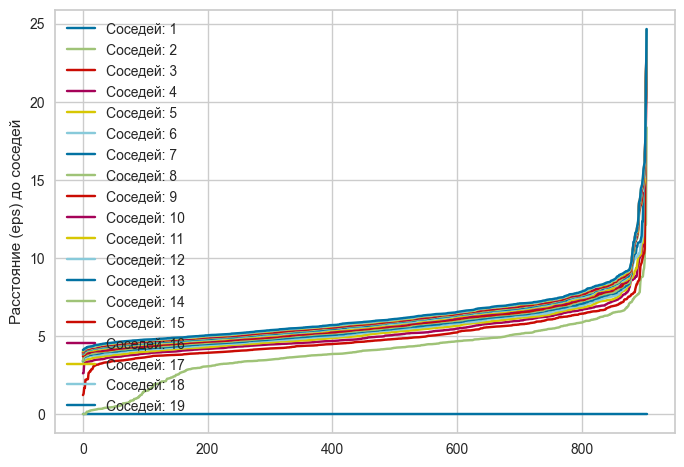

In [36]:
for i in range(1, 20):

    model_i = NearestNeighbors(n_neighbors=i)

    model_fit = model_i.fit(df_scaled)

    distances, indices  = model_fit.kneighbors(df_scaled)

    sort_distances = np.sort(distances[:, i - 1]) # расстояние до k соседа

    plt.plot(sort_distances, label = f'Соседей: {i}')
    #plt.ylim(5, 10)
    plt.ylabel('Расстояние (eps) до соседей')
    plt.legend(loc = 'upper left')


Справка для себя. Что возвращает метод `NearestNeighbours.neighbours(X)`

Индексы соседей:

[[0 1 4]  # Для точки 0: сама себя, точка 1, точка 4

 [1 0 4]  # Для точки 1: сама себя, точка 0, точка 4

 [2 3 5]  # Для точки 2: сама себя, точка 3, точка 5

 ...]

Расстояния до соседей:

[[0.         0.3605551  1.4000000]  # Расстояния для точки 0

 [0.         0.3605551  1.2083046]  # Расстояния для точки 1

 [0.         3.0000000  3.6055513]  # Расстояния для точки 2

 ...]

**Как будто самым оптимальным расстоянием (`eps`) будет 7**

In [37]:
dbcan_model = DBSCAN(eps=7, min_samples=5)

clusters = dbcan_model.fit_predict(df)

df['cluster'] = clusters

In [38]:
df_clean['cluster'] = df['cluster'].values

num_cols = df_clean.select_dtypes(['float']).columns
df_stat_1 = df_clean.groupby('cluster')[num_cols].mean()


int_cols = df_clean.select_dtypes(['int']).columns
df_stat_2 = df_clean.groupby('cluster')[int_cols].median()

df_stat = pd.concat([df_stat_1, df_stat_2], axis=1)
df_stat

Income  MntWines_Pct  MntFruits_Pct  MntMeatProducts_Pct  \
cluster                                                                   
-1       82647.108696      0.424310       0.036689             0.300668   
 0       51510.523529      0.462542       0.050262             0.245756   
 1       87281.400000      0.442627       0.033838             0.362364   
 2       83347.750000      0.422874       0.077451             0.290228   

         MntFishProducts_Pct  MntSweetProducts_Pct  MntGoldProds_Pct  \
cluster                                                                
-1                  0.045603              0.054783          0.137948   
 0                  0.073984              0.048818          0.118638   
 1                  0.064236              0.032914          0.064021   
 2                  0.088664              0.053893          0.066889   

         Avg_Purchase_Value  Web_Purchase_Ratio  Catalog_Purchase_Ratio  ...  \
cluster                                                                  ...   
-1                54.888741            0.287564                0.243508  ...   
 0                33.739491            0.293324                0.151304  ...   
 1               112.230546            0.241194                0.427584  ...   
 2                96.472222            0.213078                0.377674  ...   

         Response   Age  Age_Group  Total_Children  Has_Children  \
cluster                                                            
-1            0.5  53.0        1.0             0.5           0.5   
 0            0.0  54.0        1.0             1.0           1.0   
 1            1.0  72.0        2.0             0.0           0.0   
 2            1.0  50.0        1.0             0.0           0.0   

         Marital_Status_Simple  Total_Spent  Total_Purchases  \
cluster                                                        
-1                         0.0       1108.0             21.0   
 0                         0.0        397.5             15.0   
 1                         0.0       2257.0             18.0   
 2                         1.0       1862.0             19.0   

         Total_Campaigns_Accepted  cluster  
cluster                                     
-1                            2.0     -1.0  
 0                            0.0      0.0  
 1                            4.0      1.0  
 2                            4.0      2.0  

[4 rows x 57 columns]

In [39]:
df_clean

ID  Year_Birth  Education  Marital_Status    Income  Kidhome  \
0     5524        1957          2               4   58138.0        0   
1     2174        1954          2               4   46344.0        1   
3     6182        1984          2               5   26646.0        1   
5     7446        1967          3               5   62513.0        0   
7     6177        1985          4               3   33454.0        1   
...    ...         ...        ...             ...       ...      ...   
2224  4286        1970          4               4   57642.0        0   
2227  4201        1962          2               4   57967.0        0   
2233  9432        1977          2               5  666666.0        1   
2234  8372        1974          2               3   34421.0        1   
2236  4001        1946          4               5   64014.0        2   

      Teenhome  Recency  MntWines  MntFruits  ...  Enrollment_Month  \
0            0       58       635         88  ...               4.0   
1            1       38        11          1  ...               8.0   
3            0       26        11          4  ...              10.0   
5            1       16       520         42  ...               9.0   
7            0       32        76         10  ...               8.0   
...        ...      ...       ...        ...  ...               ...   
2224         1       24       580          6  ...               9.0   
2227         1       39       229          7  ...               3.0   
2233         0       23         9         14  ...               2.0   
2234         0       81         3          3  ...               1.0   
2236         1       56       406          0  ...              10.0   

      Enrollment_Quarter  Total_Purchases  Purchase_Frequency  \
0                    2.0               25            0.005044   
1                    3.0                6            0.001460   
3                    4.0                8            0.001975   
5                    3.0               22            0.004957   
7                    3.0               10            0.002236   
...                  ...              ...                 ...   
2224                 3.0               22            0.005391   
2227                 1.0               19            0.004105   
2233                 1.0               11            0.002364   
2234                 1.0                4            0.000854   
2236                 4.0               22            0.005437   

      Customer_Loyalty  Web_Conversion_Rate  Total_Campaigns_Accepted  \
0             0.326271             1.000000                         1   
1             0.006569             0.166667                         0   
3             0.013086             0.285714                         0   
5             0.161334             0.857143                         0   
7             0.037782             0.444444                         0   
...                ...                  ...                       ...   
2224          0.166381             1.400000                         1   
2227          0.101124             0.666667                         0   
2233          0.013325             0.428571                         0   
2234          0.006406             0.125000                         0   
2236          0.109738             1.000000                         1   

      Campaign_Acceptance_Rate  Deals_Ratio  cluster  
0                     0.166667     0.115385        0  
1                     0.000000     0.285714        0  
3                     0.000000     0.222222        0  
5                     0.000000     0.086957        0  
7                     0.000000     0.181818        0  
...                        ...          ...      ...  
2224                  0.166667     0.130435        0  
2227                  0.000000     0.250000        0  
2233                  0.000000     0.333333       -1  
2234                  0.000000     0.200000        0  
2236                  0.166

<Axes: xlabel='Age', ylabel='Income'>

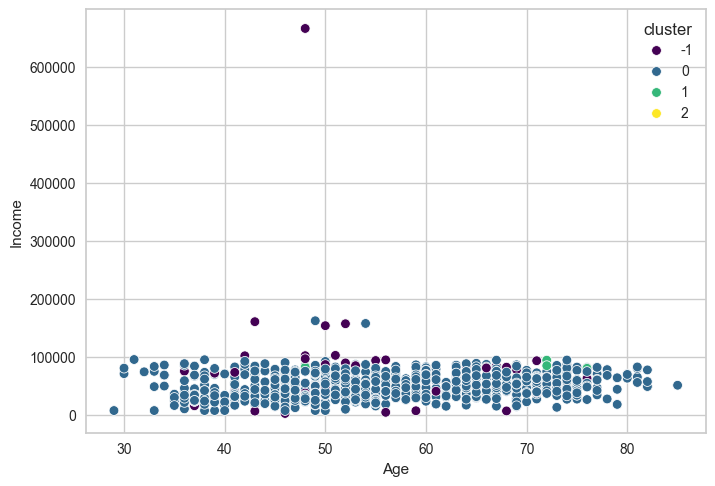

In [40]:
sns.scatterplot(x = df_clean['Age'], y = df_clean['Income'], hue= df_clean['cluster'], palette='viridis')

<Axes: xlabel='Total_Purchases', ylabel='Income'>

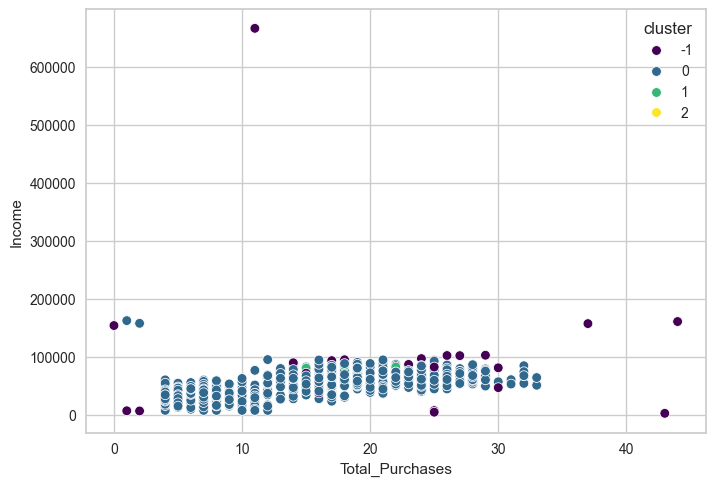

In [41]:
sns.scatterplot(x = df_clean['Total_Purchases'], y = df_clean['Income'], hue= df_clean['cluster'], palette='viridis')

<Axes: xlabel='Purchase_Frequency', ylabel='Customer_Loyalty'>

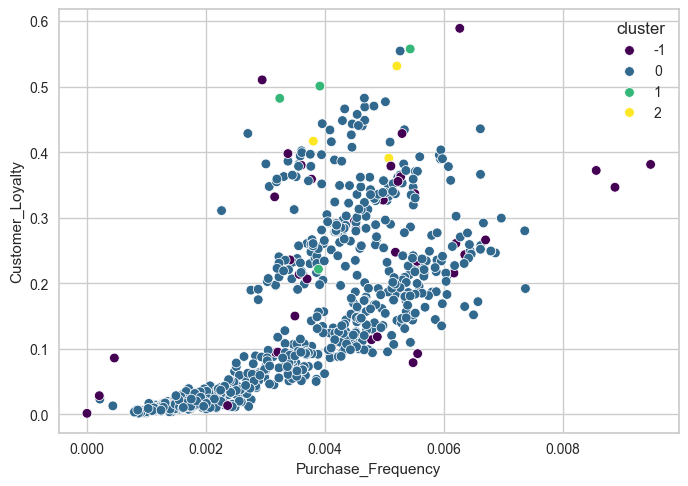

In [42]:
sns.scatterplot(x = df_clean['Purchase_Frequency'], y = df_clean['Customer_Loyalty'], hue= df_clean['cluster'], palette='viridis')

<Axes: xlabel='Avg_Purchase_Value', ylabel='Customer_Loyalty'>

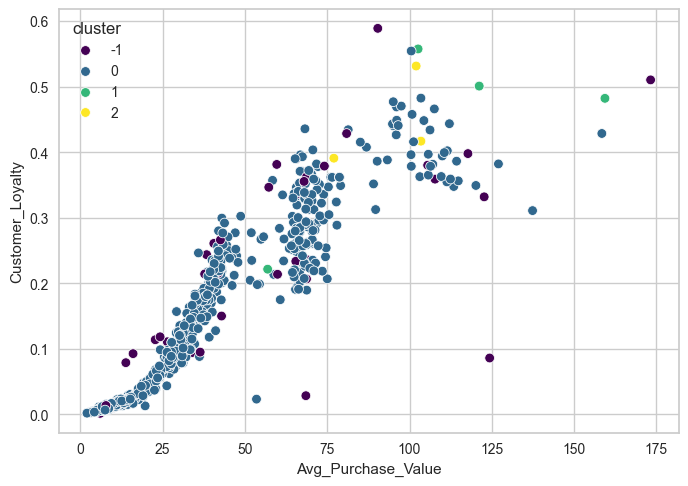

In [43]:
sns.scatterplot(x = df_clean['Avg_Purchase_Value'], y = df_clean['Customer_Loyalty'], hue= df_clean['cluster'], palette='viridis')

In [44]:
pca_model = PCA(n_components=5)

df_pca = pca_model.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns = [f'PCA_{i}' for i in range(1, 6)])
df_pca

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
0    5.835853 -0.071808 -0.682510  2.824622 -1.911324
1   -3.751408  1.019890  0.030971 -2.005807 -0.928022
2   -3.819936 -2.714284  0.148755 -1.178359  1.920963
3    0.833335  1.906801 -1.002510 -0.671540  0.260566
4   -3.047457 -0.709068  1.020165  0.487556  2.079830
..        ...       ...       ...       ...       ...
900  1.463363  2.861824  1.313657 -0.713479  1.867867
901 -0.650216  2.031222 -1.010175  0.454906 -1.433929
902  0.026670 -0.900520 -1.210197  0.591948 -0.405479
903 -4.336644 -2.630709 -0.041983  0.892161 -1.095665
904 -0.813803  6.082438  1.568786 -0.414225  1.932483

[905 rows x 5 columns]

In [45]:
pca_analysis = pd.DataFrame(data = pca_model.components_).T
labels = df_clean.columns

pca_analysis.set_index(labels, inplace=True)

In [46]:
pca_analysis

0             1         2             3  \
ID                       -6.203649e-03  2.930673e-03 -0.035247 -1.102881e-02   
Year_Birth               -3.514425e-02 -2.719708e-01  0.082008  1.411326e-01   
Education                 3.109659e-02  1.753732e-01  0.103146 -1.692175e-01   
Marital_Status            1.446242e-02  1.420228e-02 -0.039058 -2.997831e-02   
Income                    1.618192e-01  3.904156e-02 -0.042235 -8.278761e-02   
Kidhome                  -1.788577e-01 -6.121842e-03  0.096173  8.226348e-02   
Teenhome                 -5.195111e-02  3.144503e-01 -0.087143  1.559121e-02   
Recency                   2.287574e-04  1.524384e-02 -0.090258  2.003031e-02   
MntWines                  2.251587e-01  1.182549e-01  0.066377 -1.625672e-04   
MntFruits                 1.722154e-01 -1.000845e-01 -0.151687  4.783635e-02   
MntMeatProducts           2.252261e-01 -8.072373e-02 -0.056930 -2.443341e-02   
MntFishProducts           1.796852e-01 -1.102496e-01 -0.153065  4.312707e-02   
MntSweetProducts          1.712743e-01 -1.101908e-01 -0.125250  3.509115e-02   
MntGoldProds              1.466409e-01  9.673793e-03 -0.079313  1.529372e-01   
NumDealsPurchases        -2.195493e-02  2.072742e-01 -0.065621  2.799952e-01   
NumWebPurchases           1.497588e-01  1.904573e-01 -0.059285  2.332198e-01   
NumCatalogPurchases       2.236376e-01  2.965136e-03 -0.061252  3.743579e-02   
NumStorePurchases         1.851099e-01  6.307882e-02 -0.153935 -2.246074e-02   
NumWebVisitsMonth        -1.610352e-01  1.016214e-01  0.136906  2.388336e-01   
AcceptedCmp3              3.625577e-02 -2.703256e-02  0.180354  1.123216e-01   
AcceptedCmp4              8.748199e-02  7.866344e-02  0.272379 -2.707326e-02   
AcceptedCmp5              1.460639e-01 -5.411663e-02  0.245493 -7.297953e-02   
AcceptedCmp1              1.240231e-01 -3.648460e-02  0.220801 -3.686608e-02   
AcceptedCmp2              4.847696e-02 -7.167776e-03  0.175694 -3.119818e-02   
Complain                 -1.556790e-02 -2.451455e-03  0.009675  5.199391e-02   
Z_CostContact             2.802597e-45  3.851860e-34 -0.000000 -3.231174e-27   
Z_Revenue                -2.802597e-45 -0.000000e+00 -0.000000 -4.038968e-28   
Response                  9.779572e-02 -4.534328e-02  0.323114  1.180923e-01   
Age                       3.514425e-02  2.719708e-01 -0.082008 -1.411326e-01   
Age_Group                 3.084073e-02  2.576099e-01 -0.096864 -1.296016e-01   
Total_Children           -1.660779e-01  2.218858e-01  0.006487  7.041035e-02   
Has_Children             -1.762374e-01  1.899427e-01 -0.020191  1.245063e-01   
Marital_Status_Simple     2.488830e-02 -4.765333e-03  0.030234 -3.472474e-02   
Total_Spent               2.631979e-01  1.110811e-02 -0.024609  1.320732e-02   
MntWines_Pct              3.835719e-02  3.386404e-01  0.107911 -1.567131e-01   
MntFruits_Pct            -2.016831e-02 -2.231364e-01 -0.133544  1.168277e-01   
MntMeatProducts_Pct       6.976361e-02 -1.758999e-01 -0.064460 -4.713903e-02   
MntFishProducts_Pct      -2.836200e-02 -2.315780e-01 -0.114809  1.094120e-01   
MntSweetProducts_Pct     -1.894512e-02 -2.159793e-01 -0.098708  1.081268e-01   
MntGoldProds_Pct         -1.173396e-01 -1.304344e-01  0.038628  1.904074e-01   
Avg_Purchase_Value        2.416511e-01 -1.327586e-05  0.003491 -7.917360e-03   
Web_Purchase_Ratio       -1.578729e-02  1.689274e-01  0.039191  2.841174e-01   
Catalog_Purchase_Ratio    2.043692e-01 -8.486581e-03 -0.037330  3.293346e-02   
Store_Purchase_Ratio     -1.011232e-01 -8.331074e-02 -0.060484 -2.396041e-01   
Days_Since_Enrollment     2.652957e-02  1.138106e-02  0.017561  3.695374e-01   
Recency_Ratio            -2.387212e-03  1.350913e-02 -0.091410 -1.668374e-02   
Enrollment_Year          -2.535128e-02 -2.168424e-02 -0.025446 -3.304128e-01   
Enrollment_Month         -7.301731e-03  2.225135e-02  0.015524 -1.614704e-01   
Enrollment_Quarter       -9.770716e-03  1.740292e-02  0.027510 -1.549230e-01   
Total_Purchases           2.150573e-0

### Интерпретация

In [47]:
count = 0
for i in pca_analysis.columns:
    print(f'Максимально значимые признаки для PCA_{count}')
    display(pca_analysis.nlargest(5, i))
    count += 1

Максимально значимые признаки для PCA_0


0         1         2         3         4
Customer_Loyalty    0.263427  0.008158 -0.025513 -0.007414  0.055479
Total_Spent         0.263198  0.011108 -0.024609  0.013207  0.041604
Avg_Purchase_Value  0.241651 -0.000013  0.003491 -0.007917  0.025256
MntMeatProducts     0.225226 -0.080724 -0.056930 -0.024433  0.057891
MntWines            0.225159  0.118255  0.066377 -0.000163  0.052148

Максимально значимые признаки для PCA_1


0         1         2         3         4
MntWines_Pct    0.038357  0.338640  0.107911 -0.156713  0.090096
Teenhome       -0.051951  0.314450 -0.087143  0.015591 -0.030469
Age             0.035144  0.271971 -0.082008 -0.141133 -0.368727
Age_Group       0.030841  0.257610 -0.096864 -0.129602 -0.347777
Total_Children -0.166078  0.221886  0.006487  0.070410  0.076729

Максимально значимые признаки для PCA_2


0         1         2         3         4
Total_Campaigns_Accepted  0.157636 -0.029562  0.410211  0.034632 -0.051372
Campaign_Acceptance_Rate  0.157636 -0.029562  0.410211  0.034632 -0.051372
Response                  0.097796 -0.045343  0.323114  0.118092 -0.106643
AcceptedCmp4              0.087482  0.078663  0.272379 -0.027073 -0.002708
AcceptedCmp5              0.146064 -0.054117  0.245493 -0.072980  0.004938

Максимально значимые признаки для PCA_3


0         1         2         3         4
Days_Since_Enrollment  0.026530  0.011381  0.017561  0.369537 -0.277657
Web_Purchase_Ratio    -0.015787  0.168927  0.039191  0.284117  0.141763
NumDealsPurchases     -0.021955  0.207274 -0.065621  0.279995  0.108936
NumWebVisitsMonth     -0.161035  0.101621  0.136906  0.238834  0.015107
NumWebPurchases        0.149759  0.190457 -0.059285  0.233220  0.125000

Максимально значимые признаки для PCA_4


0         1         2         3         4
Year_Birth         -0.035144 -0.271971  0.082008  0.141133  0.368727
Enrollment_Quarter -0.009771  0.017403  0.027510 -0.154923  0.277134
Recency_Ratio      -0.002387  0.013509 -0.091410 -0.016684  0.266040
Enrollment_Month   -0.007302  0.022251  0.015524 -0.161470  0.265679
Recency             0.000229  0.015244 -0.090258  0.020030  0.239342

Как видно, у нас те же компоненты с такими же значимыми признаками получились. Точь в точь, как и у KMeans

PCA_1     PCA_2     PCA_3     PCA_4  cluster
0    5.835853 -0.071808 -0.682510  2.824622        0
1   -3.751408  1.019890  0.030971 -2.005807        0
2   -3.819936 -2.714284  0.148755 -1.178359        0
3    0.833335  1.906801 -1.002510 -0.671540        0
4   -3.047457 -0.709068  1.020165  0.487556        0
..        ...       ...       ...       ...      ...
900  1.463363  2.861824  1.313657 -0.713479        0
901 -0.650216  2.031222 -1.010175  0.454906        0
902  0.026670 -0.900520 -1.210197  0.591948       -1
903 -4.336644 -2.630709 -0.041983  0.892161        0
904 -0.813803  6.082438  1.568786 -0.414225        0

[905 rows x 5 columns]

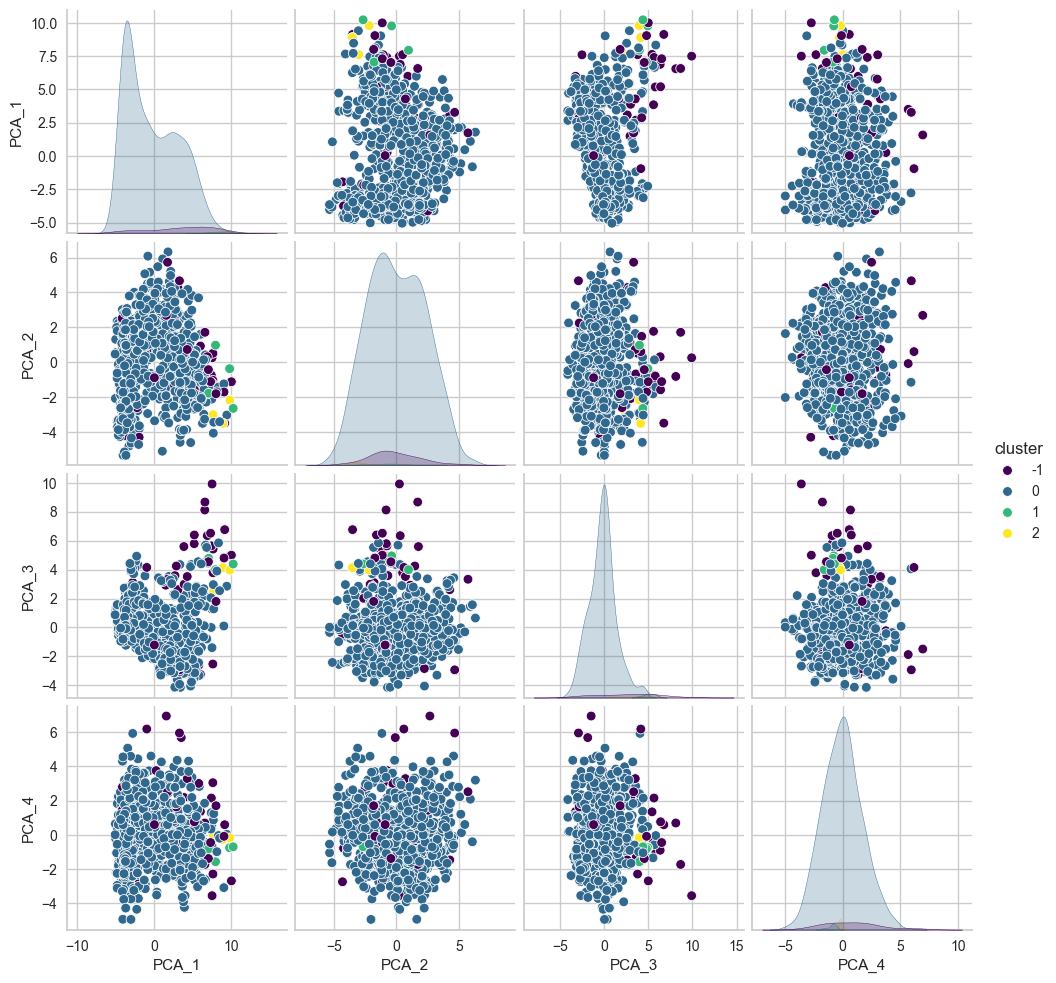

In [48]:
pca_analysis_final = pd.DataFrame(df_pca, columns=yticks)
pca_analysis_final['cluster'] = df['cluster'].values
pca_analysis_final = pca_analysis_final.drop(columns='PCA_0')

display(pca_analysis_final)


sns.pairplot(pca_analysis_final, hue='cluster', palette='viridis')

### Итог

Мне показалось, что DBSCAN справился даже хуже, чем KMeans, если посудить по некоторым графикам и по визуальному сравнению компонент на последнем графике

## Иерархическая кластеризация

In [49]:
df_clean = df.drop(columns='cluster')

In [50]:
df_clean

ID  Year_Birth  Education  Marital_Status     Income   Kidhome  \
0   -0.082092   -1.015619  -0.334073        0.216416   0.155793 -0.825286   
1   -1.109102   -1.269406  -0.334073        0.216416  -0.234608  1.005311   
2    0.119631    1.268472  -0.334073        1.140267  -0.886644  1.005311   
3    0.507136   -0.169659   0.517577        1.140267   0.300612 -0.825286   
4    0.118098    1.353067   1.369228       -0.707435  -0.661288  1.005311   
..        ...         ...        ...             ...        ...       ...   
900 -0.461626    0.084129   1.369228        0.216416   0.139374 -0.825286   
901 -0.487684   -0.592639  -0.334073        0.216416   0.150132 -0.825286   
902  1.115984    0.676300  -0.334073        1.140267  20.299059  1.005311   
903  0.791020    0.422512  -0.334073       -0.707435  -0.629279  1.005311   
904 -0.548999   -1.946174   1.369228        1.140267   0.350298  2.835908   

     Teenhome   Recency  MntWines  MntFruits  ...  Enrollment_Year  \
0   -0.934362  0.322664  0.976036   1.451404  ...        -1.470543   
1    0.895935 -0.363372 -0.888779  -0.651389  ...         1.444772   
2   -0.934362 -0.774993 -0.888779  -0.578879  ...         1.444772   
3    0.895935 -1.118011  0.632360   0.339582  ...        -0.012885   
4   -0.934362 -0.569183 -0.694527  -0.433859  ...        -0.012885   
..        ...       ...       ...        ...  ...              ...   
900  0.895935 -0.843597  0.811669  -0.530539  ...         1.444772   
901  0.895935 -0.329070 -0.237289  -0.506369  ...        -0.012885   
902 -0.934362 -0.877899 -0.894756  -0.337179  ...        -0.012885   
903 -0.934362  1.111606 -0.912687  -0.603049  ...        -0.012885   
904  0.895935  0.254061  0.291673  -0.675559  ...         1.444772   

     Enrollment_Month  Enrollment_Quarter  Total_Purchases  \
0           -0.758546           -0.496116         1.298480   
1            0.367299            0.377396        -1.172455   
2            0.930221            1.250908        -0.912356   
3            0.648760            0.377396         0.908333   
4            0.367299            0.377396        -0.652258   
..                ...                 ...              ...   
900          0.648760            0.377396         0.908333   
901         -1.040007           -1.369629         0.518185   
902         -1.321468           -1.369629        -0.522209   
903         -1.602929           -1.369629        -1.432553   
904          0.930221            1.250908         0.908333   

     Purchase_Frequency  Customer_Loyalty  Web_Conversion_Rate  \
0              1.024883          1.417108             0.167740   
1             -1.110786         -0.977370            -0.649562   
2             -0.803678         -0.928559            -0.532805   
3              0.972927          0.181774             0.027631   
4             -0.648575         -0.743594            -0.377128   
..                  ...               ...                  ...   
900            1.231295          0.219574             0.560045   
901            0.465458         -0.269185            -0.159181   
902           -0.572056         -0.926774            -0.392696   
903           -1.471663         -0.978592            -0.690427   
904            1.259079         -0.204665             0.167740   

     Total_Campaigns_Accepted  Campaign_Acceptance_Rate  Deals_Ratio  
0                    0.607293                  0.607293    -0.468289  
1                   -0.498542                 -0.498542     1.283949  
2                   -0.498542                 -0.498542     0.630785  
3                   -0.498542                 -0.498542    -0.760738  
4                   -0.498542                 -0.498542     0.215135  
..                        ...                       ...          ...  
900                  0.607293                  0.607293    -0.313463  
901                 -0.498542                 -0.498542     0.916544  
902                 -0.498542                 -0.498542     1.773822

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [22.5, 22.5, 67.5, 67.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [162.5, 162.5, 206.25, 206.25],
  [117.5, 117.5, 184.375, 184.375],
  [45.0, 45.0, 150.9375, 150.9375],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [262.5, 262.5, 290.0, 290.0],
  [240.0, 240.0, 276.25, 276.25],
  [305.0, 305.0, 315.0, 315.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [325.0, 325.0, 3

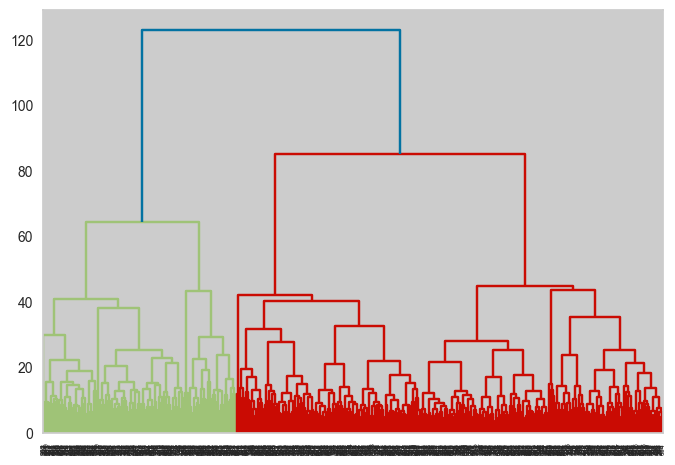

In [51]:
Z = linkage(df_clean, method='ward')
dendrogram(Z)

In [52]:
scores = []
for i in range(2, 100):
    model_i = AgglomerativeClustering(n_clusters=i, linkage='ward').fit(df_clean)
    score = silhouette_score(df_clean, model_i.labels_)
    scores.append(score)


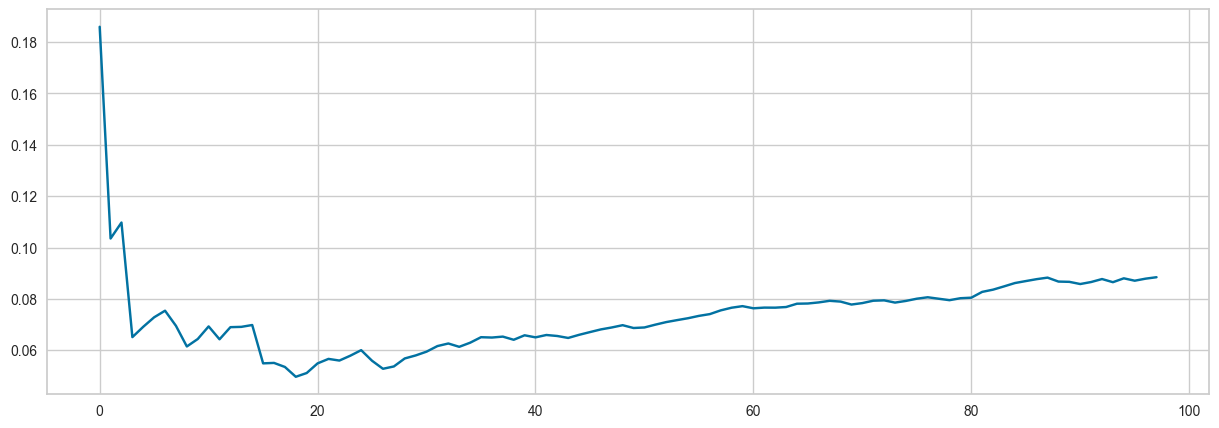

In [53]:
plt.figure(figsize=(15, 5))
plt.plot(scores)
#plt.xlim(-2, 8)

Оптимальное количество клаасетров -- 6, давайте попробуем

In [54]:
hieararchical_clusterization = AgglomerativeClustering(n_clusters=6, linkage='ward')

df_clean['cluster'] = hieararchical_clusterization.fit_predict(df_clean)

In [55]:
df_clean

ID  Year_Birth  Education  Marital_Status     Income   Kidhome  \
0   -0.082092   -1.015619  -0.334073        0.216416   0.155793 -0.825286   
1   -1.109102   -1.269406  -0.334073        0.216416  -0.234608  1.005311   
2    0.119631    1.268472  -0.334073        1.140267  -0.886644  1.005311   
3    0.507136   -0.169659   0.517577        1.140267   0.300612 -0.825286   
4    0.118098    1.353067   1.369228       -0.707435  -0.661288  1.005311   
..        ...         ...        ...             ...        ...       ...   
900 -0.461626    0.084129   1.369228        0.216416   0.139374 -0.825286   
901 -0.487684   -0.592639  -0.334073        0.216416   0.150132 -0.825286   
902  1.115984    0.676300  -0.334073        1.140267  20.299059  1.005311   
903  0.791020    0.422512  -0.334073       -0.707435  -0.629279  1.005311   
904 -0.548999   -1.946174   1.369228        1.140267   0.350298  2.835908   

     Teenhome   Recency  MntWines  MntFruits  ...  Enrollment_Month  \
0   -0.934362  0.322664  0.976036   1.451404  ...         -0.758546   
1    0.895935 -0.363372 -0.888779  -0.651389  ...          0.367299   
2   -0.934362 -0.774993 -0.888779  -0.578879  ...          0.930221   
3    0.895935 -1.118011  0.632360   0.339582  ...          0.648760   
4   -0.934362 -0.569183 -0.694527  -0.433859  ...          0.367299   
..        ...       ...       ...        ...  ...               ...   
900  0.895935 -0.843597  0.811669  -0.530539  ...          0.648760   
901  0.895935 -0.329070 -0.237289  -0.506369  ...         -1.040007   
902 -0.934362 -0.877899 -0.894756  -0.337179  ...         -1.321468   
903 -0.934362  1.111606 -0.912687  -0.603049  ...         -1.602929   
904  0.895935  0.254061  0.291673  -0.675559  ...          0.930221   

     Enrollment_Quarter  Total_Purchases  Purchase_Frequency  \
0             -0.496116         1.298480            1.024883   
1              0.377396        -1.172455           -1.110786   
2              1.250908        -0.912356           -0.803678   
3              0.377396         0.908333            0.972927   
4              0.377396        -0.652258           -0.648575   
..                  ...              ...                 ...   
900            0.377396         0.908333            1.231295   
901           -1.369629         0.518185            0.465458   
902           -1.369629        -0.522209           -0.572056   
903           -1.369629        -1.432553           -1.471663   
904            1.250908         0.908333            1.259079   

     Customer_Loyalty  Web_Conversion_Rate  Total_Campaigns_Accepted  \
0            1.417108             0.167740                  0.607293   
1           -0.977370            -0.649562                 -0.498542   
2           -0.928559            -0.532805                 -0.498542   
3            0.181774             0.027631                 -0.498542   
4           -0.743594            -0.377128                 -0.498542   
..                ...                  ...                       ...   
900          0.219574             0.560045                  0.607293   
901         -0.269185            -0.159181                 -0.498542   
902         -0.926774            -0.392696                 -0.498542   
903         -0.978592            -0.690427                 -0.498542   
904         -0.204665             0.167740                  0.607293   

     Campaign_Acceptance_Rate  Deals_Ratio  cluster  
0                    0.607293    -0.468289        1  
1                   -0.498542     1.283949        4  
2                   -0.498542     0.630785        4  
3                   -0.498542    -0.760738        2  
4                   -0.498542     0.215135        2  
..                        ...          ...      ...  
900                  0.607293    -0.313463        2  
901                 -0.498542     0.916544        2  
902                 -0.498542     1.773822        1  
903                 -0.498542     0.402178        3  
904  

<Axes: xlabel='Age', ylabel='Income'>

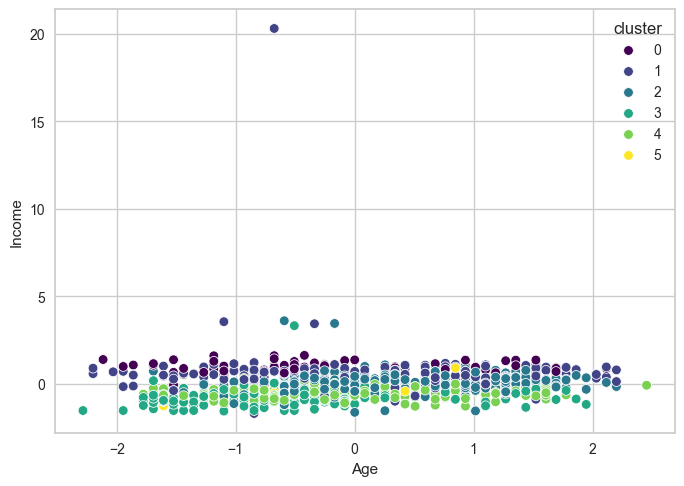

In [56]:
sns.scatterplot(x = df_clean['Age'], y = df_clean['Income'], hue= df_clean['cluster'], palette='viridis')

<Axes: xlabel='Total_Purchases', ylabel='Income'>

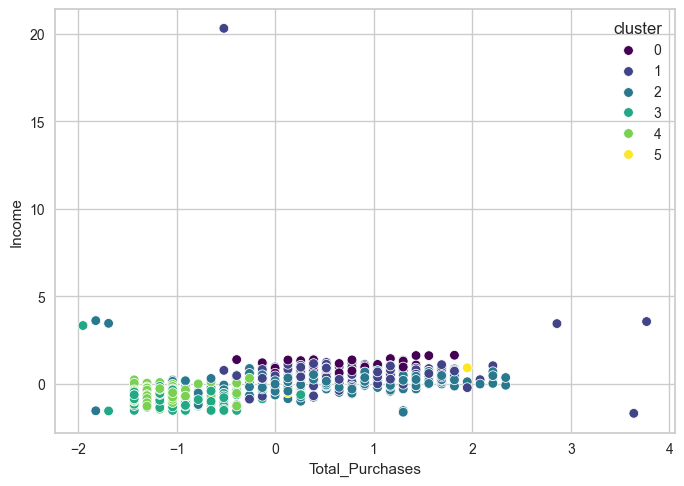

In [57]:
sns.scatterplot(x=df_clean['Total_Purchases'], y = df_clean['Income'], hue=df_clean['cluster'], palette='viridis')

<Axes: xlabel='Purchase_Frequency', ylabel='Customer_Loyalty'>

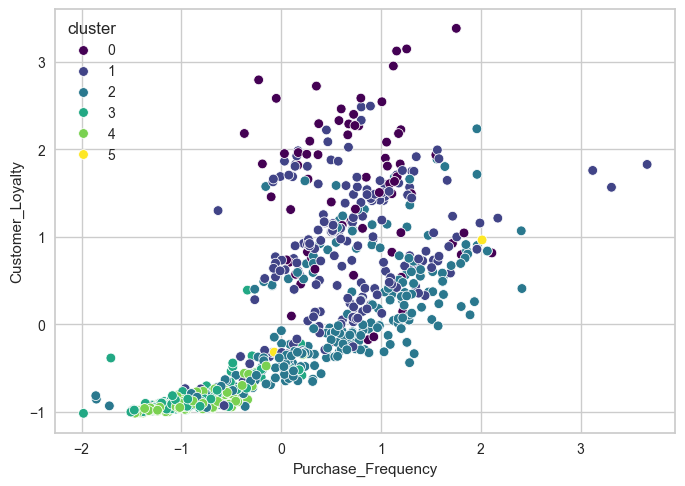

In [58]:
sns.scatterplot(x = df_clean['Purchase_Frequency'], y = df_clean['Customer_Loyalty'], hue= df_clean['cluster'], palette='viridis')

In [59]:
pca_model = PCA(n_components=5)

df_pca = pca_model.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns = [f'PCA_{i}' for i in range(1, 6)])
df_pca

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
0    5.835853 -0.071808 -0.682510  2.824622 -1.911324
1   -3.751408  1.019890  0.030971 -2.005807 -0.928022
2   -3.819936 -2.714284  0.148755 -1.178359  1.920963
3    0.833335  1.906801 -1.002510 -0.671540  0.260566
4   -3.047457 -0.709068  1.020165  0.487556  2.079830
..        ...       ...       ...       ...       ...
900  1.463363  2.861824  1.313657 -0.713479  1.867867
901 -0.650216  2.031222 -1.010175  0.454906 -1.433929
902  0.026670 -0.900520 -1.210197  0.591948 -0.405479
903 -4.336644 -2.630709 -0.041983  0.892161 -1.095665
904 -0.813803  6.082438  1.568786 -0.414225  1.932483

[905 rows x 5 columns]

In [60]:
pca_analysis = pd.DataFrame(data = pca_model.components_).T
labels = df_clean.columns

pca_analysis.set_index(labels, inplace=True)

In [61]:
pca_analysis

0             1         2             3  \
ID                       -6.203649e-03  2.930673e-03 -0.035247 -1.102881e-02   
Year_Birth               -3.514425e-02 -2.719708e-01  0.082008  1.411326e-01   
Education                 3.109659e-02  1.753732e-01  0.103146 -1.692175e-01   
Marital_Status            1.446242e-02  1.420228e-02 -0.039058 -2.997831e-02   
Income                    1.618192e-01  3.904156e-02 -0.042235 -8.278761e-02   
Kidhome                  -1.788577e-01 -6.121842e-03  0.096173  8.226348e-02   
Teenhome                 -5.195111e-02  3.144503e-01 -0.087143  1.559121e-02   
Recency                   2.287574e-04  1.524384e-02 -0.090258  2.003031e-02   
MntWines                  2.251587e-01  1.182549e-01  0.066377 -1.625672e-04   
MntFruits                 1.722154e-01 -1.000845e-01 -0.151687  4.783635e-02   
MntMeatProducts           2.252261e-01 -8.072373e-02 -0.056930 -2.443341e-02   
MntFishProducts           1.796852e-01 -1.102496e-01 -0.153065  4.312707e-02   
MntSweetProducts          1.712743e-01 -1.101908e-01 -0.125250  3.509115e-02   
MntGoldProds              1.466409e-01  9.673793e-03 -0.079313  1.529372e-01   
NumDealsPurchases        -2.195493e-02  2.072742e-01 -0.065621  2.799952e-01   
NumWebPurchases           1.497588e-01  1.904573e-01 -0.059285  2.332198e-01   
NumCatalogPurchases       2.236376e-01  2.965136e-03 -0.061252  3.743579e-02   
NumStorePurchases         1.851099e-01  6.307882e-02 -0.153935 -2.246074e-02   
NumWebVisitsMonth        -1.610352e-01  1.016214e-01  0.136906  2.388336e-01   
AcceptedCmp3              3.625577e-02 -2.703256e-02  0.180354  1.123216e-01   
AcceptedCmp4              8.748199e-02  7.866344e-02  0.272379 -2.707326e-02   
AcceptedCmp5              1.460639e-01 -5.411663e-02  0.245493 -7.297953e-02   
AcceptedCmp1              1.240231e-01 -3.648460e-02  0.220801 -3.686608e-02   
AcceptedCmp2              4.847696e-02 -7.167776e-03  0.175694 -3.119818e-02   
Complain                 -1.556790e-02 -2.451455e-03  0.009675  5.199391e-02   
Z_CostContact             2.802597e-45  3.851860e-34 -0.000000 -3.231174e-27   
Z_Revenue                -2.802597e-45 -0.000000e+00 -0.000000 -4.038968e-28   
Response                  9.779572e-02 -4.534328e-02  0.323114  1.180923e-01   
Age                       3.514425e-02  2.719708e-01 -0.082008 -1.411326e-01   
Age_Group                 3.084073e-02  2.576099e-01 -0.096864 -1.296016e-01   
Total_Children           -1.660779e-01  2.218858e-01  0.006487  7.041035e-02   
Has_Children             -1.762374e-01  1.899427e-01 -0.020191  1.245063e-01   
Marital_Status_Simple     2.488830e-02 -4.765333e-03  0.030234 -3.472474e-02   
Total_Spent               2.631979e-01  1.110811e-02 -0.024609  1.320732e-02   
MntWines_Pct              3.835719e-02  3.386404e-01  0.107911 -1.567131e-01   
MntFruits_Pct            -2.016831e-02 -2.231364e-01 -0.133544  1.168277e-01   
MntMeatProducts_Pct       6.976361e-02 -1.758999e-01 -0.064460 -4.713903e-02   
MntFishProducts_Pct      -2.836200e-02 -2.315780e-01 -0.114809  1.094120e-01   
MntSweetProducts_Pct     -1.894512e-02 -2.159793e-01 -0.098708  1.081268e-01   
MntGoldProds_Pct         -1.173396e-01 -1.304344e-01  0.038628  1.904074e-01   
Avg_Purchase_Value        2.416511e-01 -1.327586e-05  0.003491 -7.917360e-03   
Web_Purchase_Ratio       -1.578729e-02  1.689274e-01  0.039191  2.841174e-01   
Catalog_Purchase_Ratio    2.043692e-01 -8.486581e-03 -0.037330  3.293346e-02   
Store_Purchase_Ratio     -1.011232e-01 -8.331074e-02 -0.060484 -2.396041e-01   
Days_Since_Enrollment     2.652957e-02  1.138106e-02  0.017561  3.695374e-01   
Recency_Ratio            -2.387212e-03  1.350913e-02 -0.091410 -1.668374e-02   
Enrollment_Year          -2.535128e-02 -2.168424e-02 -0.025446 -3.304128e-01   
Enrollment_Month         -7.301731e-03  2.225135e-02  0.015524 -1.614704e-01   
Enrollment_Quarter       -9.770716e-03  1.740292e-02  0.027510 -1.549230e-01   
Total_Purchases           2.150573e-0

### Интерпретация

In [62]:
count = 0
for i in pca_analysis.columns:
    print(f'Максимально значимые признаки для PCA_{count}')
    display(pca_analysis.nlargest(5, i))
    count += 1

Максимально значимые признаки для PCA_0


0         1         2         3         4
Customer_Loyalty    0.263427  0.008158 -0.025513 -0.007414  0.055479
Total_Spent         0.263198  0.011108 -0.024609  0.013207  0.041604
Avg_Purchase_Value  0.241651 -0.000013  0.003491 -0.007917  0.025256
MntMeatProducts     0.225226 -0.080724 -0.056930 -0.024433  0.057891
MntWines            0.225159  0.118255  0.066377 -0.000163  0.052148

Максимально значимые признаки для PCA_1


0         1         2         3         4
MntWines_Pct    0.038357  0.338640  0.107911 -0.156713  0.090096
Teenhome       -0.051951  0.314450 -0.087143  0.015591 -0.030469
Age             0.035144  0.271971 -0.082008 -0.141133 -0.368727
Age_Group       0.030841  0.257610 -0.096864 -0.129602 -0.347777
Total_Children -0.166078  0.221886  0.006487  0.070410  0.076729

Максимально значимые признаки для PCA_2


0         1         2         3         4
Total_Campaigns_Accepted  0.157636 -0.029562  0.410211  0.034632 -0.051372
Campaign_Acceptance_Rate  0.157636 -0.029562  0.410211  0.034632 -0.051372
Response                  0.097796 -0.045343  0.323114  0.118092 -0.106643
AcceptedCmp4              0.087482  0.078663  0.272379 -0.027073 -0.002708
AcceptedCmp5              0.146064 -0.054117  0.245493 -0.072980  0.004938

Максимально значимые признаки для PCA_3


0         1         2         3         4
Days_Since_Enrollment  0.026530  0.011381  0.017561  0.369537 -0.277657
Web_Purchase_Ratio    -0.015787  0.168927  0.039191  0.284117  0.141763
NumDealsPurchases     -0.021955  0.207274 -0.065621  0.279995  0.108936
NumWebVisitsMonth     -0.161035  0.101621  0.136906  0.238834  0.015107
NumWebPurchases        0.149759  0.190457 -0.059285  0.233220  0.125000

Максимально значимые признаки для PCA_4


0         1         2         3         4
Year_Birth         -0.035144 -0.271971  0.082008  0.141133  0.368727
Enrollment_Quarter -0.009771  0.017403  0.027510 -0.154923  0.277134
Recency_Ratio      -0.002387  0.013509 -0.091410 -0.016684  0.266040
Enrollment_Month   -0.007302  0.022251  0.015524 -0.161470  0.265679
Recency             0.000229  0.015244 -0.090258  0.020030  0.239342

PCA_1     PCA_2     PCA_3     PCA_4  cluster
0    5.835853 -0.071808 -0.682510  2.824622        0
1   -3.751408  1.019890  0.030971 -2.005807        0
2   -3.819936 -2.714284  0.148755 -1.178359        0
3    0.833335  1.906801 -1.002510 -0.671540        0
4   -3.047457 -0.709068  1.020165  0.487556        0
..        ...       ...       ...       ...      ...
900  1.463363  2.861824  1.313657 -0.713479        0
901 -0.650216  2.031222 -1.010175  0.454906        0
902  0.026670 -0.900520 -1.210197  0.591948       -1
903 -4.336644 -2.630709 -0.041983  0.892161        0
904 -0.813803  6.082438  1.568786 -0.414225        0

[905 rows x 5 columns]

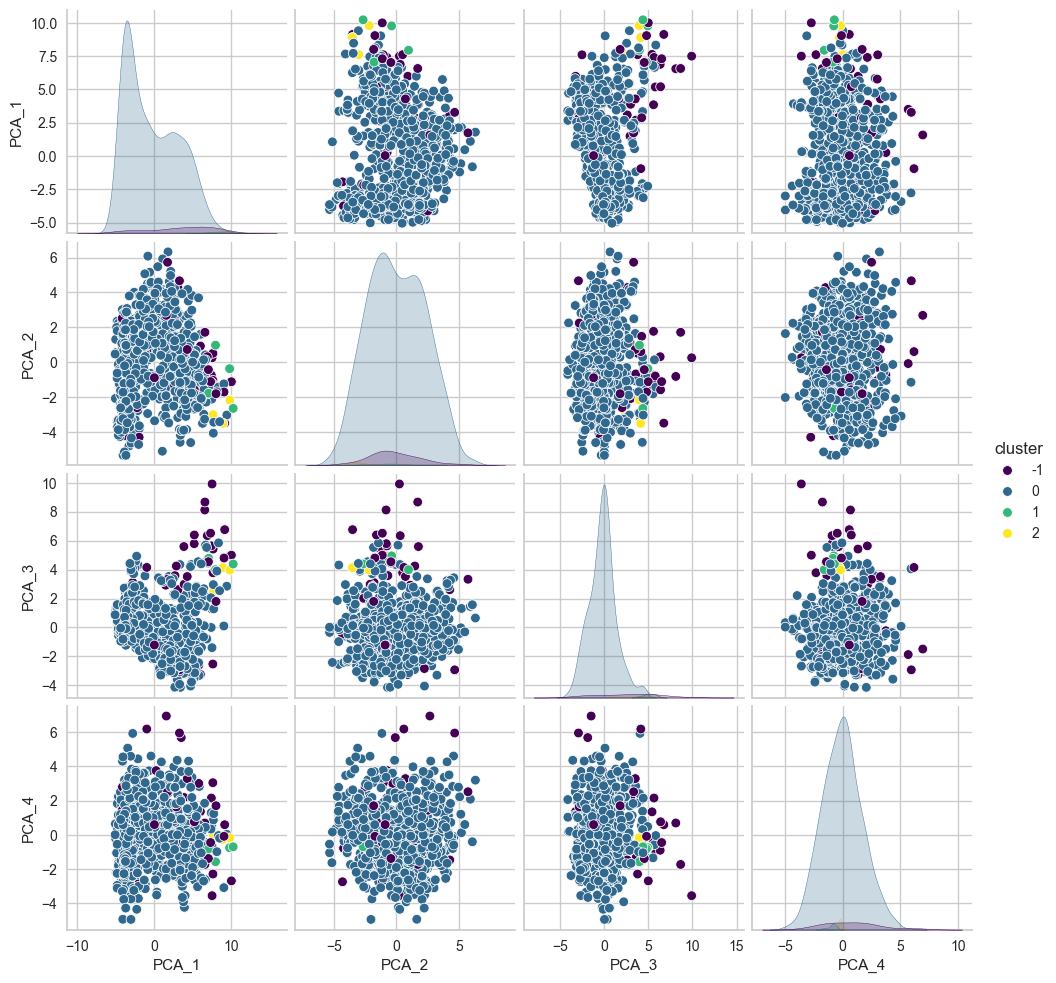

In [63]:
pca_analysis_final = pd.DataFrame(df_pca, columns=yticks)
pca_analysis_final['cluster'] = df['cluster'].values
pca_analysis_final = pca_analysis_final.drop(columns='PCA_0')

display(pca_analysis_final)


sns.pairplot(pca_analysis_final, hue='cluster', palette='viridis')

### Итог

В итоге и иерархическая кластеризация показала себя с не самой лучшей стороны, разделения на большие группы почти нет, что немного печалит, даже если посмотреть на другие алгоритмы

## Общие выводы

In [64]:
df = df.drop(columns = 'cluster')

In [65]:
# Лучшая модель K-means

model = KMeans(k_optimal, random_state=42)

labels = model.fit_predict(df)

df['k_means_cluster'] = labels

# Лучшая модель DBSCAN

dbcan_model = DBSCAN(eps=7, min_samples=5)

clusters = dbcan_model.fit_predict(df)

df['dbscan_cluster'] = clusters


# Лучшая модель иерархической кластериизации

hieararchical_clusterization = AgglomerativeClustering(n_clusters=6, linkage='ward')

df['ierarchical_cluster'] = hieararchical_clusterization.fit_predict(df)

In [66]:
df

ID  Year_Birth  Education  Marital_Status     Income   Kidhome  \
0   -0.082092   -1.015619  -0.334073        0.216416   0.155793 -0.825286   
1   -1.109102   -1.269406  -0.334073        0.216416  -0.234608  1.005311   
2    0.119631    1.268472  -0.334073        1.140267  -0.886644  1.005311   
3    0.507136   -0.169659   0.517577        1.140267   0.300612 -0.825286   
4    0.118098    1.353067   1.369228       -0.707435  -0.661288  1.005311   
..        ...         ...        ...             ...        ...       ...   
900 -0.461626    0.084129   1.369228        0.216416   0.139374 -0.825286   
901 -0.487684   -0.592639  -0.334073        0.216416   0.150132 -0.825286   
902  1.115984    0.676300  -0.334073        1.140267  20.299059  1.005311   
903  0.791020    0.422512  -0.334073       -0.707435  -0.629279  1.005311   
904 -0.548999   -1.946174   1.369228        1.140267   0.350298  2.835908   

     Teenhome   Recency  MntWines  MntFruits  ...  Total_Purchases  \
0   -0.934362  0.322664  0.976036   1.451404  ...         1.298480   
1    0.895935 -0.363372 -0.888779  -0.651389  ...        -1.172455   
2   -0.934362 -0.774993 -0.888779  -0.578879  ...        -0.912356   
3    0.895935 -1.118011  0.632360   0.339582  ...         0.908333   
4   -0.934362 -0.569183 -0.694527  -0.433859  ...        -0.652258   
..        ...       ...       ...        ...  ...              ...   
900  0.895935 -0.843597  0.811669  -0.530539  ...         0.908333   
901  0.895935 -0.329070 -0.237289  -0.506369  ...         0.518185   
902 -0.934362 -0.877899 -0.894756  -0.337179  ...        -0.522209   
903 -0.934362  1.111606 -0.912687  -0.603049  ...        -1.432553   
904  0.895935  0.254061  0.291673  -0.675559  ...         0.908333   

     Purchase_Frequency  Customer_Loyalty  Web_Conversion_Rate  \
0              1.024883          1.417108             0.167740   
1             -1.110786         -0.977370            -0.649562   
2             -0.803678         -0.928559            -0.532805   
3              0.972927          0.181774             0.027631   
4             -0.648575         -0.743594            -0.377128   
..                  ...               ...                  ...   
900            1.231295          0.219574             0.560045   
901            0.465458         -0.269185            -0.159181   
902           -0.572056         -0.926774            -0.392696   
903           -1.471663         -0.978592            -0.690427   
904            1.259079         -0.204665             0.167740   

     Total_Campaigns_Accepted  Campaign_Acceptance_Rate  Deals_Ratio  \
0                    0.607293                  0.607293    -0.468289   
1                   -0.498542                 -0.498542     1.283949   
2                   -0.498542                 -0.498542     0.630785   
3                   -0.498542                 -0.498542    -0.760738   
4                   -0.498542                 -0.498542     0.215135   
..                        ...                       ...          ...   
900                  0.607293                  0.607293    -0.313463   
901                 -0.498542                 -0.498542     0.916544   
902                 -0.498542                 -0.498542     1.773822   
903                 -0.498542                 -0.498542     0.402178   
904                  0.607293                  0.607293     1.475638   

     k_means_cluster  dbscan_cluster  ierarchical_cluster  
0                  0               0                    4  
1                  4               0                    3  
2                  9               0                    1  
3                  5               0                    5  
4                  1               0                    3  
..               ...             ...                  ...  
900                5               0                    5  
901                8               0                    0  
902               11              -1           

In [ ]:
def evaluate_clustering(df, cluster_column):
    clusters = df[cluster_column]
    n_clusters = len(clusters.unique()) - (1 if -1 in clusters.values else 0)
    noise_points = (clusters == -1).sum()
    noise_percentage = noise_points / len(df) * 100
    
    if n_clusters > 1: 
        silhouette = silhouette_score(df.select_dtypes(include=[np.number]), clusters)
    else:
        silhouette = np.nan
    
    return {
        'n_clusters': n_clusters,
        'noise_points': noise_points,
        'noise_percentage': noise_percentage,
        'silhouette': silhouette,
        'cluster_sizes': clusters.value_counts()
    }

results = {}
for algo in ['k_means_cluster', 'dbscan_cluster', 'ierarchical_cluster']:
    results[algo] = evaluate_clustering(df, algo)

results_df = pd.DataFrame(results).T
print("Детальное сравнение алгоритмов:")
display(results_df)

Детальное сравнение алгоритмов:


n_clusters noise_points noise_percentage silhouette  \
k_means_cluster             14            0              0.0   0.154662   
dbscan_cluster               3           58          6.40884   0.197999   
ierarchical_cluster          6            0              0.0   0.175191   

                                                         cluster_sizes  
k_means_cluster      k_means_cluster
0     115
4     115
9     106
...  
dbscan_cluster       dbscan_cluster
 0    837
-1     58
 2      5
 ...  
ierarchical_cluster  ierarchical_cluster
0    222
3    214
1    154...

Как по мне, **самый лучший алгоритм -- Kmeans**: 
1) Все точки разбиватся на 14 разных кластеров, можем провести более детальную сегментацию
2) Нет выбросов

На втором месте -- Иерархическая кластеризация:
1) Нет выбросов и все точки разбиваются на 6 групп, но в сравнении с Kmeans можно было бы провести более углубленную сегментацию
2) Более высокий score, чем у KMeans


Самый худший алгоритм -- DBSCAN:
1) Только лишь 3 кластера, куча выбросов, алгоритм явно не понял данные
2) Несмотря на то, что у него высокий silhouette score, он достигается как раз таки потому, что разделить на 3 кластера очень просто